In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.python import keras
import seaborn as sns

/Users/jutraman/opt/anaconda3/envs/mle_tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jutraman/opt/anaconda3/envs/mle_tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jutraman/opt/anaconda3/envs/mle_tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jutraman/opt/anaco

In [5]:
nursery_data = pd.read_csv('nursery_data.csv', names=["parents","has_nurs","form","children","housing","finance","social","health","class"])
print(nursery_data.isnull())
nursery_data

       parents  has_nurs   form  children  housing  finance  social  health  \
0        False     False  False     False    False    False   False   False   
1        False     False  False     False    False    False   False   False   
2        False     False  False     False    False    False   False   False   
3        False     False  False     False    False    False   False   False   
4        False     False  False     False    False    False   False   False   
...        ...       ...    ...       ...      ...      ...     ...     ...   
12955    False     False  False     False    False    False   False   False   
12956    False     False  False     False    False    False   False   False   
12957    False     False  False     False    False    False   False   False   
12958    False     False  False     False    False    False   False   False   
12959    False     False  False     False    False    False   False   False   

       class  
0      False  
1      False  
2     

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [6]:
#Categorical
features = ["parents","has_nurs","form","children","housing","finance","social","health","class"]
for column in features:
    nursery_data[column] = nursery_data[column].astype("category").cat.codes
nursery_data

,parents,has_nurs,form,children,housing,finance,social,health,class
0,2,3,0,0,0,0,0,2,2
1,2,3,0,0,0,0,0,1,1
2,2,3,0,0,0,0,0,0,0
3,2,3,0,0,0,0,2,2,2
4,2,3,0,0,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...
12955,0,4,2,3,1,1,2,1,3
12956,0,4,2,3,1,1,2,0,0
12957,0,4,2,3,1,1,1,2,3
12958,0,4,2,3,1,1,1,1,3


In [29]:
target = ["class"]
X=nursery_data.drop(target,axis=1)
X=np.array(X)
Y=pd.DataFrame(nursery_data[target])
Y=np.array(Y)
X,Y

(array([[2, 3, 0, ..., 0, 0, 2],
        [2, 3, 0, ..., 0, 0, 1],
        [2, 3, 0, ..., 0, 0, 0],
        ...,
        [0, 4, 2, ..., 1, 1, 2],
        [0, 4, 2, ..., 1, 1, 1],
        [0, 4, 2, ..., 1, 1, 0]], dtype=int8),
 array([[2],
        [1],
        [0],
        ...,
        [3],
        [3],
        [0]], dtype=int8))

In [32]:
model = tf.keras.Sequential([
    keras.layers.Dense(25, input_shape=(8,), activation=tf.nn.tanh),
    keras.layers.Dense(13, activation=tf.nn.tanh),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.30)
model.compile(loss='sparse_categorical_crossentropy',
            optimizer=keras.optimizers.Adam(0.000001),
             metrics=['accuracy'])
xtest.shape,ytest.shape,xtrain.shape,ytrain.shape

((3888, 8), (3888, 1), (9072, 8), (9072, 1))

In [34]:
history = model.fit(xtrain, ytrain, epochs=10000, validation_split=0.10,verbose=2)

Train on 8164 samples, validate on 908 samples
Epoch 1/10000
 - 0s - loss: 1.5260 - acc: 0.3018 - val_loss: 1.5219 - val_acc: 0.3216
Epoch 2/10000
 - 0s - loss: 1.5222 - acc: 0.3029 - val_loss: 1.5182 - val_acc: 0.3238
Epoch 3/10000
 - 0s - loss: 1.5185 - acc: 0.3044 - val_loss: 1.5146 - val_acc: 0.3249
Epoch 4/10000
 - 0s - loss: 1.5149 - acc: 0.3063 - val_loss: 1.5111 - val_acc: 0.3238
Epoch 5/10000
 - 0s - loss: 1.5112 - acc: 0.3068 - val_loss: 1.5075 - val_acc: 0.3238
Epoch 6/10000
 - 0s - loss: 1.5076 - acc: 0.3070 - val_loss: 1.5040 - val_acc: 0.3227
Epoch 7/10000
 - 0s - loss: 1.5041 - acc: 0.3074 - val_loss: 1.5005 - val_acc: 0.3238
Epoch 8/10000
 - 0s - loss: 1.5006 - acc: 0.3082 - val_loss: 1.4971 - val_acc: 0.3216
Epoch 9/10000
 - 1s - loss: 1.4971 - acc: 0.3092 - val_loss: 1.4937 - val_acc: 0.3194
Epoch 10/10000
 - 0s - loss: 1.4936 - acc: 0.3100 - val_loss: 1.4904 - val_acc: 0.3205
Epoch 11/10000
 - 0s - loss: 1.4902 - acc: 0.3103 - val_loss: 1.4870 - val_acc: 0.3216
Epoch

Epoch 95/10000
 - 0s - loss: 1.2862 - acc: 0.3923 - val_loss: 1.2888 - val_acc: 0.4009
Epoch 96/10000
 - 0s - loss: 1.2845 - acc: 0.3933 - val_loss: 1.2871 - val_acc: 0.4009
Epoch 97/10000
 - 0s - loss: 1.2828 - acc: 0.3942 - val_loss: 1.2854 - val_acc: 0.4020
Epoch 98/10000
 - 0s - loss: 1.2811 - acc: 0.3947 - val_loss: 1.2838 - val_acc: 0.4042
Epoch 99/10000
 - 0s - loss: 1.2794 - acc: 0.3953 - val_loss: 1.2821 - val_acc: 0.4053
Epoch 100/10000
 - 0s - loss: 1.2777 - acc: 0.3965 - val_loss: 1.2805 - val_acc: 0.4064
Epoch 101/10000
 - 0s - loss: 1.2761 - acc: 0.3974 - val_loss: 1.2789 - val_acc: 0.4075
Epoch 102/10000
 - 0s - loss: 1.2744 - acc: 0.3986 - val_loss: 1.2772 - val_acc: 0.4086
Epoch 103/10000
 - 0s - loss: 1.2728 - acc: 0.3997 - val_loss: 1.2756 - val_acc: 0.4097
Epoch 104/10000
 - 1s - loss: 1.2711 - acc: 0.4004 - val_loss: 1.2740 - val_acc: 0.4130
Epoch 105/10000
 - 0s - loss: 1.2695 - acc: 0.4013 - val_loss: 1.2725 - val_acc: 0.4141
Epoch 106/10000
 - 0s - loss: 1.2679 

 - 0s - loss: 1.1622 - acc: 0.4938 - val_loss: 1.1667 - val_acc: 0.5165
Epoch 189/10000
 - 0s - loss: 1.1612 - acc: 0.4946 - val_loss: 1.1656 - val_acc: 0.5187
Epoch 190/10000
 - 0s - loss: 1.1601 - acc: 0.4953 - val_loss: 1.1646 - val_acc: 0.5198
Epoch 191/10000
 - 0s - loss: 1.1591 - acc: 0.4969 - val_loss: 1.1635 - val_acc: 0.5209
Epoch 192/10000
 - 0s - loss: 1.1581 - acc: 0.4976 - val_loss: 1.1625 - val_acc: 0.5242
Epoch 193/10000
 - 0s - loss: 1.1570 - acc: 0.4988 - val_loss: 1.1615 - val_acc: 0.5231
Epoch 194/10000
 - 0s - loss: 1.1560 - acc: 0.5002 - val_loss: 1.1604 - val_acc: 0.5231
Epoch 195/10000
 - 0s - loss: 1.1550 - acc: 0.5010 - val_loss: 1.1594 - val_acc: 0.5253
Epoch 196/10000
 - 0s - loss: 1.1539 - acc: 0.5022 - val_loss: 1.1584 - val_acc: 0.5264
Epoch 197/10000
 - 0s - loss: 1.1529 - acc: 0.5033 - val_loss: 1.1574 - val_acc: 0.5264
Epoch 198/10000
 - 0s - loss: 1.1519 - acc: 0.5048 - val_loss: 1.1564 - val_acc: 0.5264
Epoch 199/10000
 - 0s - loss: 1.1509 - acc: 0.50

Epoch 282/10000
 - 0s - loss: 1.0765 - acc: 0.5713 - val_loss: 1.0810 - val_acc: 0.5848
Epoch 283/10000
 - 0s - loss: 1.0757 - acc: 0.5721 - val_loss: 1.0802 - val_acc: 0.5848
Epoch 284/10000
 - 0s - loss: 1.0748 - acc: 0.5729 - val_loss: 1.0794 - val_acc: 0.5848
Epoch 285/10000
 - 0s - loss: 1.0740 - acc: 0.5737 - val_loss: 1.0786 - val_acc: 0.5859
Epoch 286/10000
 - 0s - loss: 1.0732 - acc: 0.5750 - val_loss: 1.0778 - val_acc: 0.5859
Epoch 287/10000
 - 0s - loss: 1.0724 - acc: 0.5753 - val_loss: 1.0770 - val_acc: 0.5859
Epoch 288/10000
 - 0s - loss: 1.0716 - acc: 0.5761 - val_loss: 1.0762 - val_acc: 0.5881
Epoch 289/10000
 - 0s - loss: 1.0708 - acc: 0.5767 - val_loss: 1.0754 - val_acc: 0.5881
Epoch 290/10000
 - 0s - loss: 1.0700 - acc: 0.5774 - val_loss: 1.0745 - val_acc: 0.5881
Epoch 291/10000
 - 0s - loss: 1.0692 - acc: 0.5779 - val_loss: 1.0737 - val_acc: 0.5881
Epoch 292/10000
 - 0s - loss: 1.0684 - acc: 0.5788 - val_loss: 1.0729 - val_acc: 0.5892
Epoch 293/10000
 - 0s - loss: 1.

 - 0s - loss: 1.0042 - acc: 0.6265 - val_loss: 1.0086 - val_acc: 0.6112
Epoch 376/10000
 - 0s - loss: 1.0035 - acc: 0.6270 - val_loss: 1.0079 - val_acc: 0.6123
Epoch 377/10000
 - 0s - loss: 1.0027 - acc: 0.6280 - val_loss: 1.0071 - val_acc: 0.6123
Epoch 378/10000
 - 0s - loss: 1.0020 - acc: 0.6282 - val_loss: 1.0063 - val_acc: 0.6123
Epoch 379/10000
 - 0s - loss: 1.0012 - acc: 0.6285 - val_loss: 1.0056 - val_acc: 0.6123
Epoch 380/10000
 - 0s - loss: 1.0005 - acc: 0.6286 - val_loss: 1.0048 - val_acc: 0.6145
Epoch 381/10000
 - 0s - loss: 0.9997 - acc: 0.6291 - val_loss: 1.0041 - val_acc: 0.6134
Epoch 382/10000
 - 0s - loss: 0.9990 - acc: 0.6292 - val_loss: 1.0033 - val_acc: 0.6134
Epoch 383/10000
 - 0s - loss: 0.9982 - acc: 0.6296 - val_loss: 1.0026 - val_acc: 0.6145
Epoch 384/10000
 - 0s - loss: 0.9975 - acc: 0.6307 - val_loss: 1.0018 - val_acc: 0.6145
Epoch 385/10000
 - 0s - loss: 0.9967 - acc: 0.6312 - val_loss: 1.0011 - val_acc: 0.6145
Epoch 386/10000
 - 0s - loss: 0.9960 - acc: 0.63

Epoch 469/10000
 - 0s - loss: 0.9346 - acc: 0.6681 - val_loss: 0.9385 - val_acc: 0.6674
Epoch 470/10000
 - 0s - loss: 0.9339 - acc: 0.6689 - val_loss: 0.9377 - val_acc: 0.6685
Epoch 471/10000
 - 0s - loss: 0.9331 - acc: 0.6692 - val_loss: 0.9370 - val_acc: 0.6696
Epoch 472/10000
 - 0s - loss: 0.9324 - acc: 0.6695 - val_loss: 0.9362 - val_acc: 0.6685
Epoch 473/10000
 - 0s - loss: 0.9317 - acc: 0.6698 - val_loss: 0.9355 - val_acc: 0.6707
Epoch 474/10000
 - 0s - loss: 0.9309 - acc: 0.6700 - val_loss: 0.9348 - val_acc: 0.6707
Epoch 475/10000
 - 0s - loss: 0.9302 - acc: 0.6704 - val_loss: 0.9340 - val_acc: 0.6707
Epoch 476/10000
 - 0s - loss: 0.9295 - acc: 0.6706 - val_loss: 0.9333 - val_acc: 0.6696
Epoch 477/10000
 - 0s - loss: 0.9287 - acc: 0.6709 - val_loss: 0.9325 - val_acc: 0.6696
Epoch 478/10000
 - 0s - loss: 0.9280 - acc: 0.6716 - val_loss: 0.9318 - val_acc: 0.6707
Epoch 479/10000
 - 0s - loss: 0.9273 - acc: 0.6725 - val_loss: 0.9311 - val_acc: 0.6707
Epoch 480/10000
 - 0s - loss: 0.

 - 0s - loss: 0.8673 - acc: 0.7068 - val_loss: 0.8703 - val_acc: 0.7048
Epoch 563/10000
 - 0s - loss: 0.8666 - acc: 0.7068 - val_loss: 0.8696 - val_acc: 0.7048
Epoch 564/10000
 - 0s - loss: 0.8658 - acc: 0.7071 - val_loss: 0.8688 - val_acc: 0.7048
Epoch 565/10000
 - 0s - loss: 0.8651 - acc: 0.7074 - val_loss: 0.8681 - val_acc: 0.7048
Epoch 566/10000
 - 0s - loss: 0.8644 - acc: 0.7076 - val_loss: 0.8674 - val_acc: 0.7048
Epoch 567/10000
 - 0s - loss: 0.8637 - acc: 0.7077 - val_loss: 0.8667 - val_acc: 0.7059
Epoch 568/10000
 - 0s - loss: 0.8630 - acc: 0.7081 - val_loss: 0.8660 - val_acc: 0.7070
Epoch 569/10000
 - 0s - loss: 0.8623 - acc: 0.7085 - val_loss: 0.8652 - val_acc: 0.7070
Epoch 570/10000
 - 0s - loss: 0.8616 - acc: 0.7088 - val_loss: 0.8645 - val_acc: 0.7070
Epoch 571/10000
 - 0s - loss: 0.8609 - acc: 0.7088 - val_loss: 0.8638 - val_acc: 0.7081
Epoch 572/10000
 - 0s - loss: 0.8602 - acc: 0.7091 - val_loss: 0.8631 - val_acc: 0.7093
Epoch 573/10000
 - 0s - loss: 0.8594 - acc: 0.70

Epoch 656/10000
 - 0s - loss: 0.8020 - acc: 0.7357 - val_loss: 0.8039 - val_acc: 0.7335
Epoch 657/10000
 - 0s - loss: 0.8014 - acc: 0.7359 - val_loss: 0.8032 - val_acc: 0.7346
Epoch 658/10000
 - 0s - loss: 0.8007 - acc: 0.7364 - val_loss: 0.8025 - val_acc: 0.7346
Epoch 659/10000
 - 0s - loss: 0.8000 - acc: 0.7365 - val_loss: 0.8019 - val_acc: 0.7357
Epoch 660/10000
 - 0s - loss: 0.7994 - acc: 0.7365 - val_loss: 0.8012 - val_acc: 0.7357
Epoch 661/10000
 - 0s - loss: 0.7987 - acc: 0.7371 - val_loss: 0.8005 - val_acc: 0.7357
Epoch 662/10000
 - 0s - loss: 0.7980 - acc: 0.7376 - val_loss: 0.7998 - val_acc: 0.7357
Epoch 663/10000
 - 0s - loss: 0.7974 - acc: 0.7382 - val_loss: 0.7991 - val_acc: 0.7357
Epoch 664/10000
 - 0s - loss: 0.7967 - acc: 0.7386 - val_loss: 0.7985 - val_acc: 0.7357
Epoch 665/10000
 - 0s - loss: 0.7960 - acc: 0.7389 - val_loss: 0.7978 - val_acc: 0.7357
Epoch 666/10000
 - 0s - loss: 0.7954 - acc: 0.7391 - val_loss: 0.7971 - val_acc: 0.7357
Epoch 667/10000
 - 0s - loss: 0.

 - 0s - loss: 0.7422 - acc: 0.7558 - val_loss: 0.7427 - val_acc: 0.7478
Epoch 750/10000
 - 0s - loss: 0.7416 - acc: 0.7560 - val_loss: 0.7421 - val_acc: 0.7489
Epoch 751/10000
 - 0s - loss: 0.7410 - acc: 0.7564 - val_loss: 0.7415 - val_acc: 0.7489
Epoch 752/10000
 - 0s - loss: 0.7404 - acc: 0.7562 - val_loss: 0.7409 - val_acc: 0.7500
Epoch 753/10000
 - 0s - loss: 0.7398 - acc: 0.7565 - val_loss: 0.7402 - val_acc: 0.7511
Epoch 754/10000
 - 0s - loss: 0.7391 - acc: 0.7567 - val_loss: 0.7396 - val_acc: 0.7511
Epoch 755/10000
 - 0s - loss: 0.7385 - acc: 0.7569 - val_loss: 0.7390 - val_acc: 0.7511
Epoch 756/10000
 - 0s - loss: 0.7379 - acc: 0.7571 - val_loss: 0.7384 - val_acc: 0.7522
Epoch 757/10000
 - 0s - loss: 0.7373 - acc: 0.7575 - val_loss: 0.7377 - val_acc: 0.7522
Epoch 758/10000
 - 0s - loss: 0.7367 - acc: 0.7576 - val_loss: 0.7371 - val_acc: 0.7522
Epoch 759/10000
 - 0s - loss: 0.7361 - acc: 0.7577 - val_loss: 0.7365 - val_acc: 0.7522
Epoch 760/10000
 - 0s - loss: 0.7355 - acc: 0.75

Epoch 843/10000
 - 0s - loss: 0.6883 - acc: 0.7669 - val_loss: 0.6874 - val_acc: 0.7709
Epoch 844/10000
 - 0s - loss: 0.6877 - acc: 0.7669 - val_loss: 0.6869 - val_acc: 0.7709
Epoch 845/10000
 - 0s - loss: 0.6872 - acc: 0.7673 - val_loss: 0.6863 - val_acc: 0.7709
Epoch 846/10000
 - 1s - loss: 0.6867 - acc: 0.7674 - val_loss: 0.6858 - val_acc: 0.7709
Epoch 847/10000
 - 1s - loss: 0.6862 - acc: 0.7675 - val_loss: 0.6852 - val_acc: 0.7709
Epoch 848/10000
 - 1s - loss: 0.6856 - acc: 0.7681 - val_loss: 0.6847 - val_acc: 0.7709
Epoch 849/10000
 - 1s - loss: 0.6851 - acc: 0.7681 - val_loss: 0.6841 - val_acc: 0.7720
Epoch 850/10000
 - 1s - loss: 0.6846 - acc: 0.7683 - val_loss: 0.6836 - val_acc: 0.7720
Epoch 851/10000
 - 1s - loss: 0.6841 - acc: 0.7681 - val_loss: 0.6831 - val_acc: 0.7720
Epoch 852/10000
 - 1s - loss: 0.6835 - acc: 0.7681 - val_loss: 0.6825 - val_acc: 0.7720
Epoch 853/10000
 - 1s - loss: 0.6830 - acc: 0.7681 - val_loss: 0.6820 - val_acc: 0.7720
Epoch 854/10000
 - 1s - loss: 0.

 - 0s - loss: 0.6426 - acc: 0.7755 - val_loss: 0.6404 - val_acc: 0.7775
Epoch 937/10000
 - 1s - loss: 0.6421 - acc: 0.7754 - val_loss: 0.6399 - val_acc: 0.7775
Epoch 938/10000
 - 1s - loss: 0.6417 - acc: 0.7756 - val_loss: 0.6395 - val_acc: 0.7775
Epoch 939/10000
 - 0s - loss: 0.6412 - acc: 0.7757 - val_loss: 0.6390 - val_acc: 0.7775
Epoch 940/10000
 - 1s - loss: 0.6408 - acc: 0.7760 - val_loss: 0.6385 - val_acc: 0.7775
Epoch 941/10000
 - 1s - loss: 0.6404 - acc: 0.7760 - val_loss: 0.6381 - val_acc: 0.7786
Epoch 942/10000
 - 0s - loss: 0.6399 - acc: 0.7757 - val_loss: 0.6376 - val_acc: 0.7786
Epoch 943/10000
 - 0s - loss: 0.6395 - acc: 0.7761 - val_loss: 0.6372 - val_acc: 0.7786
Epoch 944/10000
 - 0s - loss: 0.6390 - acc: 0.7758 - val_loss: 0.6367 - val_acc: 0.7786
Epoch 945/10000
 - 0s - loss: 0.6386 - acc: 0.7760 - val_loss: 0.6363 - val_acc: 0.7786
Epoch 946/10000
 - 0s - loss: 0.6381 - acc: 0.7760 - val_loss: 0.6358 - val_acc: 0.7775
Epoch 947/10000
 - 0s - loss: 0.6377 - acc: 0.77

Epoch 1029/10000
 - 0s - loss: 0.6047 - acc: 0.7761 - val_loss: 0.6013 - val_acc: 0.7808
Epoch 1030/10000
 - 0s - loss: 0.6043 - acc: 0.7761 - val_loss: 0.6009 - val_acc: 0.7819
Epoch 1031/10000
 - 0s - loss: 0.6040 - acc: 0.7761 - val_loss: 0.6005 - val_acc: 0.7819
Epoch 1032/10000
 - 0s - loss: 0.6036 - acc: 0.7762 - val_loss: 0.6001 - val_acc: 0.7819
Epoch 1033/10000
 - 0s - loss: 0.6032 - acc: 0.7760 - val_loss: 0.5997 - val_acc: 0.7819
Epoch 1034/10000
 - 0s - loss: 0.6029 - acc: 0.7758 - val_loss: 0.5994 - val_acc: 0.7819
Epoch 1035/10000
 - 0s - loss: 0.6025 - acc: 0.7758 - val_loss: 0.5990 - val_acc: 0.7819
Epoch 1036/10000
 - 0s - loss: 0.6021 - acc: 0.7760 - val_loss: 0.5986 - val_acc: 0.7819
Epoch 1037/10000
 - 0s - loss: 0.6018 - acc: 0.7760 - val_loss: 0.5982 - val_acc: 0.7819
Epoch 1038/10000
 - 0s - loss: 0.6014 - acc: 0.7763 - val_loss: 0.5979 - val_acc: 0.7819
Epoch 1039/10000
 - 0s - loss: 0.6011 - acc: 0.7763 - val_loss: 0.5975 - val_acc: 0.7819
Epoch 1040/10000
 - 0

 - 0s - loss: 0.5742 - acc: 0.7773 - val_loss: 0.5696 - val_acc: 0.7863
Epoch 1122/10000
 - 0s - loss: 0.5739 - acc: 0.7776 - val_loss: 0.5693 - val_acc: 0.7863
Epoch 1123/10000
 - 0s - loss: 0.5736 - acc: 0.7776 - val_loss: 0.5690 - val_acc: 0.7863
Epoch 1124/10000
 - 0s - loss: 0.5734 - acc: 0.7778 - val_loss: 0.5687 - val_acc: 0.7863
Epoch 1125/10000
 - 0s - loss: 0.5731 - acc: 0.7779 - val_loss: 0.5684 - val_acc: 0.7863
Epoch 1126/10000
 - 0s - loss: 0.5728 - acc: 0.7780 - val_loss: 0.5681 - val_acc: 0.7863
Epoch 1127/10000
 - 0s - loss: 0.5725 - acc: 0.7777 - val_loss: 0.5678 - val_acc: 0.7874
Epoch 1128/10000
 - 0s - loss: 0.5722 - acc: 0.7779 - val_loss: 0.5675 - val_acc: 0.7874
Epoch 1129/10000
 - 0s - loss: 0.5719 - acc: 0.7778 - val_loss: 0.5672 - val_acc: 0.7874
Epoch 1130/10000
 - 0s - loss: 0.5716 - acc: 0.7779 - val_loss: 0.5669 - val_acc: 0.7874
Epoch 1131/10000
 - 0s - loss: 0.5713 - acc: 0.7777 - val_loss: 0.5666 - val_acc: 0.7874
Epoch 1132/10000
 - 0s - loss: 0.5710 

Epoch 1214/10000
 - 0s - loss: 0.5496 - acc: 0.7768 - val_loss: 0.5439 - val_acc: 0.7963
Epoch 1215/10000
 - 0s - loss: 0.5493 - acc: 0.7768 - val_loss: 0.5436 - val_acc: 0.7963
Epoch 1216/10000
 - 0s - loss: 0.5491 - acc: 0.7766 - val_loss: 0.5434 - val_acc: 0.7963
Epoch 1217/10000
 - 0s - loss: 0.5489 - acc: 0.7765 - val_loss: 0.5431 - val_acc: 0.7963
Epoch 1218/10000
 - 0s - loss: 0.5487 - acc: 0.7763 - val_loss: 0.5429 - val_acc: 0.7963
Epoch 1219/10000
 - 0s - loss: 0.5484 - acc: 0.7765 - val_loss: 0.5426 - val_acc: 0.7963
Epoch 1220/10000
 - 0s - loss: 0.5482 - acc: 0.7766 - val_loss: 0.5424 - val_acc: 0.7963
Epoch 1221/10000
 - 0s - loss: 0.5480 - acc: 0.7767 - val_loss: 0.5421 - val_acc: 0.7963
Epoch 1222/10000
 - 0s - loss: 0.5477 - acc: 0.7767 - val_loss: 0.5419 - val_acc: 0.7963
Epoch 1223/10000
 - 0s - loss: 0.5475 - acc: 0.7766 - val_loss: 0.5417 - val_acc: 0.7974
Epoch 1224/10000
 - 0s - loss: 0.5473 - acc: 0.7767 - val_loss: 0.5414 - val_acc: 0.7974
Epoch 1225/10000
 - 0

 - 0s - loss: 0.5301 - acc: 0.7773 - val_loss: 0.5233 - val_acc: 0.7974
Epoch 1307/10000
 - 0s - loss: 0.5300 - acc: 0.7776 - val_loss: 0.5231 - val_acc: 0.7985
Epoch 1308/10000
 - 0s - loss: 0.5298 - acc: 0.7776 - val_loss: 0.5229 - val_acc: 0.7985
Epoch 1309/10000
 - 0s - loss: 0.5296 - acc: 0.7778 - val_loss: 0.5227 - val_acc: 0.7985
Epoch 1310/10000
 - 0s - loss: 0.5294 - acc: 0.7777 - val_loss: 0.5225 - val_acc: 0.7996
Epoch 1311/10000
 - 0s - loss: 0.5292 - acc: 0.7784 - val_loss: 0.5224 - val_acc: 0.7996
Epoch 1312/10000
 - 0s - loss: 0.5290 - acc: 0.7782 - val_loss: 0.5222 - val_acc: 0.7996
Epoch 1313/10000
 - 0s - loss: 0.5288 - acc: 0.7784 - val_loss: 0.5220 - val_acc: 0.7996
Epoch 1314/10000
 - 0s - loss: 0.5287 - acc: 0.7784 - val_loss: 0.5218 - val_acc: 0.7996
Epoch 1315/10000
 - 0s - loss: 0.5285 - acc: 0.7785 - val_loss: 0.5216 - val_acc: 0.7996
Epoch 1316/10000
 - 0s - loss: 0.5283 - acc: 0.7784 - val_loss: 0.5214 - val_acc: 0.7996
Epoch 1317/10000
 - 0s - loss: 0.5281 

Epoch 1399/10000
 - 0s - loss: 0.5145 - acc: 0.7801 - val_loss: 0.5067 - val_acc: 0.8051
Epoch 1400/10000
 - 0s - loss: 0.5143 - acc: 0.7799 - val_loss: 0.5065 - val_acc: 0.8051
Epoch 1401/10000
 - 1s - loss: 0.5142 - acc: 0.7803 - val_loss: 0.5063 - val_acc: 0.8051
Epoch 1402/10000
 - 1s - loss: 0.5140 - acc: 0.7801 - val_loss: 0.5062 - val_acc: 0.8051
Epoch 1403/10000
 - 0s - loss: 0.5139 - acc: 0.7800 - val_loss: 0.5060 - val_acc: 0.8051
Epoch 1404/10000
 - 0s - loss: 0.5137 - acc: 0.7800 - val_loss: 0.5059 - val_acc: 0.8051
Epoch 1405/10000
 - 0s - loss: 0.5136 - acc: 0.7803 - val_loss: 0.5057 - val_acc: 0.8051
Epoch 1406/10000
 - 0s - loss: 0.5134 - acc: 0.7800 - val_loss: 0.5056 - val_acc: 0.8051
Epoch 1407/10000
 - 0s - loss: 0.5133 - acc: 0.7801 - val_loss: 0.5054 - val_acc: 0.8051
Epoch 1408/10000
 - 0s - loss: 0.5131 - acc: 0.7803 - val_loss: 0.5052 - val_acc: 0.8051
Epoch 1409/10000
 - 0s - loss: 0.5130 - acc: 0.7801 - val_loss: 0.5051 - val_acc: 0.8051
Epoch 1410/10000
 - 0

 - 0s - loss: 0.5019 - acc: 0.7817 - val_loss: 0.4933 - val_acc: 0.8073
Epoch 1492/10000
 - 0s - loss: 0.5018 - acc: 0.7817 - val_loss: 0.4931 - val_acc: 0.8073
Epoch 1493/10000
 - 0s - loss: 0.5017 - acc: 0.7815 - val_loss: 0.4930 - val_acc: 0.8073
Epoch 1494/10000
 - 0s - loss: 0.5016 - acc: 0.7817 - val_loss: 0.4929 - val_acc: 0.8062
Epoch 1495/10000
 - 0s - loss: 0.5014 - acc: 0.7817 - val_loss: 0.4927 - val_acc: 0.8062
Epoch 1496/10000
 - 0s - loss: 0.5013 - acc: 0.7815 - val_loss: 0.4926 - val_acc: 0.8073
Epoch 1497/10000
 - 0s - loss: 0.5012 - acc: 0.7817 - val_loss: 0.4925 - val_acc: 0.8073
Epoch 1498/10000
 - 0s - loss: 0.5011 - acc: 0.7815 - val_loss: 0.4923 - val_acc: 0.8073
Epoch 1499/10000
 - 0s - loss: 0.5010 - acc: 0.7816 - val_loss: 0.4922 - val_acc: 0.8073
Epoch 1500/10000
 - 0s - loss: 0.5008 - acc: 0.7815 - val_loss: 0.4921 - val_acc: 0.8062
Epoch 1501/10000
 - 0s - loss: 0.5007 - acc: 0.7817 - val_loss: 0.4919 - val_acc: 0.8062
Epoch 1502/10000
 - 0s - loss: 0.5006 

Epoch 1584/10000
 - 0s - loss: 0.4914 - acc: 0.7827 - val_loss: 0.4820 - val_acc: 0.8073
Epoch 1585/10000
 - 0s - loss: 0.4913 - acc: 0.7826 - val_loss: 0.4819 - val_acc: 0.8073
Epoch 1586/10000
 - 0s - loss: 0.4912 - acc: 0.7828 - val_loss: 0.4818 - val_acc: 0.8073
Epoch 1587/10000
 - 0s - loss: 0.4911 - acc: 0.7828 - val_loss: 0.4817 - val_acc: 0.8073
Epoch 1588/10000
 - 0s - loss: 0.4910 - acc: 0.7829 - val_loss: 0.4816 - val_acc: 0.8073
Epoch 1589/10000
 - 0s - loss: 0.4909 - acc: 0.7829 - val_loss: 0.4815 - val_acc: 0.8073
Epoch 1590/10000
 - 0s - loss: 0.4908 - acc: 0.7829 - val_loss: 0.4814 - val_acc: 0.8073
Epoch 1591/10000
 - 0s - loss: 0.4907 - acc: 0.7832 - val_loss: 0.4813 - val_acc: 0.8073
Epoch 1592/10000
 - 0s - loss: 0.4906 - acc: 0.7832 - val_loss: 0.4811 - val_acc: 0.8062
Epoch 1593/10000
 - 0s - loss: 0.4905 - acc: 0.7833 - val_loss: 0.4810 - val_acc: 0.8062
Epoch 1594/10000
 - 0s - loss: 0.4904 - acc: 0.7833 - val_loss: 0.4809 - val_acc: 0.8062
Epoch 1595/10000
 - 0

 - 0s - loss: 0.4827 - acc: 0.7853 - val_loss: 0.4727 - val_acc: 0.8084
Epoch 1677/10000
 - 0s - loss: 0.4826 - acc: 0.7852 - val_loss: 0.4726 - val_acc: 0.8084
Epoch 1678/10000
 - 0s - loss: 0.4825 - acc: 0.7853 - val_loss: 0.4725 - val_acc: 0.8084
Epoch 1679/10000
 - 0s - loss: 0.4824 - acc: 0.7853 - val_loss: 0.4724 - val_acc: 0.8084
Epoch 1680/10000
 - 0s - loss: 0.4823 - acc: 0.7856 - val_loss: 0.4723 - val_acc: 0.8084
Epoch 1681/10000
 - 0s - loss: 0.4822 - acc: 0.7856 - val_loss: 0.4722 - val_acc: 0.8084
Epoch 1682/10000
 - 0s - loss: 0.4821 - acc: 0.7855 - val_loss: 0.4721 - val_acc: 0.8084
Epoch 1683/10000
 - 0s - loss: 0.4820 - acc: 0.7856 - val_loss: 0.4720 - val_acc: 0.8084
Epoch 1684/10000
 - 0s - loss: 0.4820 - acc: 0.7856 - val_loss: 0.4719 - val_acc: 0.8084
Epoch 1685/10000
 - 0s - loss: 0.4819 - acc: 0.7858 - val_loss: 0.4718 - val_acc: 0.8084
Epoch 1686/10000
 - 0s - loss: 0.4818 - acc: 0.7858 - val_loss: 0.4717 - val_acc: 0.8084
Epoch 1687/10000
 - 0s - loss: 0.4817 

Epoch 1769/10000
 - 0s - loss: 0.4749 - acc: 0.7877 - val_loss: 0.4644 - val_acc: 0.8062
Epoch 1770/10000
 - 0s - loss: 0.4748 - acc: 0.7877 - val_loss: 0.4644 - val_acc: 0.8062
Epoch 1771/10000
 - 0s - loss: 0.4747 - acc: 0.7877 - val_loss: 0.4643 - val_acc: 0.8062
Epoch 1772/10000
 - 0s - loss: 0.4747 - acc: 0.7877 - val_loss: 0.4642 - val_acc: 0.8062
Epoch 1773/10000
 - 0s - loss: 0.4746 - acc: 0.7877 - val_loss: 0.4641 - val_acc: 0.8062
Epoch 1774/10000
 - 0s - loss: 0.4745 - acc: 0.7878 - val_loss: 0.4640 - val_acc: 0.8062
Epoch 1775/10000
 - 0s - loss: 0.4744 - acc: 0.7877 - val_loss: 0.4639 - val_acc: 0.8062
Epoch 1776/10000
 - 0s - loss: 0.4744 - acc: 0.7877 - val_loss: 0.4639 - val_acc: 0.8062
Epoch 1777/10000
 - 0s - loss: 0.4743 - acc: 0.7877 - val_loss: 0.4638 - val_acc: 0.8062
Epoch 1778/10000
 - 0s - loss: 0.4742 - acc: 0.7877 - val_loss: 0.4637 - val_acc: 0.8062
Epoch 1779/10000
 - 0s - loss: 0.4741 - acc: 0.7878 - val_loss: 0.4636 - val_acc: 0.8062
Epoch 1780/10000
 - 0

 - 0s - loss: 0.4680 - acc: 0.7908 - val_loss: 0.4572 - val_acc: 0.8062
Epoch 1862/10000
 - 0s - loss: 0.4679 - acc: 0.7907 - val_loss: 0.4571 - val_acc: 0.8062
Epoch 1863/10000
 - 0s - loss: 0.4678 - acc: 0.7909 - val_loss: 0.4570 - val_acc: 0.8062
Epoch 1864/10000
 - 0s - loss: 0.4678 - acc: 0.7910 - val_loss: 0.4570 - val_acc: 0.8062
Epoch 1865/10000
 - 0s - loss: 0.4677 - acc: 0.7910 - val_loss: 0.4569 - val_acc: 0.8062
Epoch 1866/10000
 - 0s - loss: 0.4676 - acc: 0.7910 - val_loss: 0.4568 - val_acc: 0.8062
Epoch 1867/10000
 - 0s - loss: 0.4676 - acc: 0.7913 - val_loss: 0.4567 - val_acc: 0.8062
Epoch 1868/10000
 - 0s - loss: 0.4675 - acc: 0.7910 - val_loss: 0.4566 - val_acc: 0.8062
Epoch 1869/10000
 - 0s - loss: 0.4674 - acc: 0.7914 - val_loss: 0.4566 - val_acc: 0.8062
Epoch 1870/10000
 - 0s - loss: 0.4673 - acc: 0.7913 - val_loss: 0.4565 - val_acc: 0.8062
Epoch 1871/10000
 - 0s - loss: 0.4673 - acc: 0.7913 - val_loss: 0.4564 - val_acc: 0.8062
Epoch 1872/10000
 - 0s - loss: 0.4672 

Epoch 1954/10000
 - 0s - loss: 0.4615 - acc: 0.7931 - val_loss: 0.4505 - val_acc: 0.8128
Epoch 1955/10000
 - 0s - loss: 0.4615 - acc: 0.7931 - val_loss: 0.4504 - val_acc: 0.8128
Epoch 1956/10000
 - 0s - loss: 0.4614 - acc: 0.7931 - val_loss: 0.4504 - val_acc: 0.8128
Epoch 1957/10000
 - 0s - loss: 0.4613 - acc: 0.7932 - val_loss: 0.4503 - val_acc: 0.8128
Epoch 1958/10000
 - 0s - loss: 0.4613 - acc: 0.7934 - val_loss: 0.4502 - val_acc: 0.8128
Epoch 1959/10000
 - 0s - loss: 0.4612 - acc: 0.7932 - val_loss: 0.4502 - val_acc: 0.8128
Epoch 1960/10000
 - 0s - loss: 0.4611 - acc: 0.7935 - val_loss: 0.4501 - val_acc: 0.8128
Epoch 1961/10000
 - 0s - loss: 0.4611 - acc: 0.7936 - val_loss: 0.4500 - val_acc: 0.8128
Epoch 1962/10000
 - 0s - loss: 0.4610 - acc: 0.7936 - val_loss: 0.4499 - val_acc: 0.8128
Epoch 1963/10000
 - 0s - loss: 0.4609 - acc: 0.7935 - val_loss: 0.4499 - val_acc: 0.8128
Epoch 1964/10000
 - 0s - loss: 0.4609 - acc: 0.7935 - val_loss: 0.4498 - val_acc: 0.8128
Epoch 1965/10000
 - 0

 - 0s - loss: 0.4555 - acc: 0.7964 - val_loss: 0.4443 - val_acc: 0.8161
Epoch 2047/10000
 - 0s - loss: 0.4554 - acc: 0.7963 - val_loss: 0.4442 - val_acc: 0.8172
Epoch 2048/10000
 - 0s - loss: 0.4554 - acc: 0.7965 - val_loss: 0.4441 - val_acc: 0.8161
Epoch 2049/10000
 - 0s - loss: 0.4553 - acc: 0.7965 - val_loss: 0.4441 - val_acc: 0.8161
Epoch 2050/10000
 - 0s - loss: 0.4552 - acc: 0.7963 - val_loss: 0.4440 - val_acc: 0.8161
Epoch 2051/10000
 - 0s - loss: 0.4552 - acc: 0.7964 - val_loss: 0.4440 - val_acc: 0.8172
Epoch 2052/10000
 - 0s - loss: 0.4551 - acc: 0.7965 - val_loss: 0.4439 - val_acc: 0.8161
Epoch 2053/10000
 - 0s - loss: 0.4550 - acc: 0.7964 - val_loss: 0.4438 - val_acc: 0.8161
Epoch 2054/10000
 - 0s - loss: 0.4550 - acc: 0.7967 - val_loss: 0.4438 - val_acc: 0.8172
Epoch 2055/10000
 - 0s - loss: 0.4549 - acc: 0.7967 - val_loss: 0.4437 - val_acc: 0.8172
Epoch 2056/10000
 - 0s - loss: 0.4549 - acc: 0.7967 - val_loss: 0.4436 - val_acc: 0.8172
Epoch 2057/10000
 - 0s - loss: 0.4548 

Epoch 2139/10000
 - 0s - loss: 0.4496 - acc: 0.7988 - val_loss: 0.4383 - val_acc: 0.8194
Epoch 2140/10000
 - 0s - loss: 0.4496 - acc: 0.7988 - val_loss: 0.4383 - val_acc: 0.8194
Epoch 2141/10000
 - 0s - loss: 0.4495 - acc: 0.7988 - val_loss: 0.4382 - val_acc: 0.8194
Epoch 2142/10000
 - 0s - loss: 0.4494 - acc: 0.7988 - val_loss: 0.4381 - val_acc: 0.8194
Epoch 2143/10000
 - 0s - loss: 0.4494 - acc: 0.7988 - val_loss: 0.4381 - val_acc: 0.8194
Epoch 2144/10000
 - 0s - loss: 0.4493 - acc: 0.7985 - val_loss: 0.4380 - val_acc: 0.8194
Epoch 2145/10000
 - 0s - loss: 0.4493 - acc: 0.7988 - val_loss: 0.4379 - val_acc: 0.8194
Epoch 2146/10000
 - 0s - loss: 0.4492 - acc: 0.7988 - val_loss: 0.4379 - val_acc: 0.8194
Epoch 2147/10000
 - 0s - loss: 0.4491 - acc: 0.7985 - val_loss: 0.4378 - val_acc: 0.8194
Epoch 2148/10000
 - 0s - loss: 0.4491 - acc: 0.7986 - val_loss: 0.4377 - val_acc: 0.8194
Epoch 2149/10000
 - 0s - loss: 0.4490 - acc: 0.7986 - val_loss: 0.4377 - val_acc: 0.8194
Epoch 2150/10000
 - 0

 - 0s - loss: 0.4440 - acc: 0.8007 - val_loss: 0.4326 - val_acc: 0.8205
Epoch 2232/10000
 - 0s - loss: 0.4439 - acc: 0.8008 - val_loss: 0.4326 - val_acc: 0.8205
Epoch 2233/10000
 - 0s - loss: 0.4439 - acc: 0.8010 - val_loss: 0.4325 - val_acc: 0.8205
Epoch 2234/10000
 - 0s - loss: 0.4438 - acc: 0.8011 - val_loss: 0.4324 - val_acc: 0.8205
Epoch 2235/10000
 - 0s - loss: 0.4437 - acc: 0.8011 - val_loss: 0.4324 - val_acc: 0.8205
Epoch 2236/10000
 - 0s - loss: 0.4437 - acc: 0.8010 - val_loss: 0.4323 - val_acc: 0.8205
Epoch 2237/10000
 - 0s - loss: 0.4436 - acc: 0.8013 - val_loss: 0.4323 - val_acc: 0.8205
Epoch 2238/10000
 - 0s - loss: 0.4435 - acc: 0.8014 - val_loss: 0.4322 - val_acc: 0.8205
Epoch 2239/10000
 - 0s - loss: 0.4435 - acc: 0.8013 - val_loss: 0.4321 - val_acc: 0.8205
Epoch 2240/10000
 - 0s - loss: 0.4434 - acc: 0.8017 - val_loss: 0.4321 - val_acc: 0.8205
Epoch 2241/10000
 - 0s - loss: 0.4434 - acc: 0.8016 - val_loss: 0.4320 - val_acc: 0.8205
Epoch 2242/10000
 - 0s - loss: 0.4433 

Epoch 2324/10000
 - 0s - loss: 0.4383 - acc: 0.8039 - val_loss: 0.4270 - val_acc: 0.8205
Epoch 2325/10000
 - 0s - loss: 0.4383 - acc: 0.8039 - val_loss: 0.4270 - val_acc: 0.8194
Epoch 2326/10000
 - 0s - loss: 0.4382 - acc: 0.8038 - val_loss: 0.4269 - val_acc: 0.8194
Epoch 2327/10000
 - 0s - loss: 0.4382 - acc: 0.8038 - val_loss: 0.4268 - val_acc: 0.8194
Epoch 2328/10000
 - 0s - loss: 0.4381 - acc: 0.8038 - val_loss: 0.4268 - val_acc: 0.8194
Epoch 2329/10000
 - 0s - loss: 0.4380 - acc: 0.8038 - val_loss: 0.4267 - val_acc: 0.8194
Epoch 2330/10000
 - 0s - loss: 0.4380 - acc: 0.8038 - val_loss: 0.4267 - val_acc: 0.8194
Epoch 2331/10000
 - 0s - loss: 0.4379 - acc: 0.8038 - val_loss: 0.4266 - val_acc: 0.8194
Epoch 2332/10000
 - 0s - loss: 0.4379 - acc: 0.8038 - val_loss: 0.4265 - val_acc: 0.8194
Epoch 2333/10000
 - 0s - loss: 0.4378 - acc: 0.8039 - val_loss: 0.4265 - val_acc: 0.8194
Epoch 2334/10000
 - 0s - loss: 0.4377 - acc: 0.8039 - val_loss: 0.4264 - val_acc: 0.8194
Epoch 2335/10000
 - 0

 - 0s - loss: 0.4328 - acc: 0.8054 - val_loss: 0.4215 - val_acc: 0.8194
Epoch 2417/10000
 - 0s - loss: 0.4327 - acc: 0.8052 - val_loss: 0.4215 - val_acc: 0.8194
Epoch 2418/10000
 - 0s - loss: 0.4327 - acc: 0.8052 - val_loss: 0.4214 - val_acc: 0.8194
Epoch 2419/10000
 - 0s - loss: 0.4326 - acc: 0.8052 - val_loss: 0.4214 - val_acc: 0.8194
Epoch 2420/10000
 - 0s - loss: 0.4325 - acc: 0.8054 - val_loss: 0.4213 - val_acc: 0.8194
Epoch 2421/10000
 - 0s - loss: 0.4325 - acc: 0.8055 - val_loss: 0.4212 - val_acc: 0.8194
Epoch 2422/10000
 - 0s - loss: 0.4324 - acc: 0.8055 - val_loss: 0.4212 - val_acc: 0.8205
Epoch 2423/10000
 - 0s - loss: 0.4324 - acc: 0.8052 - val_loss: 0.4211 - val_acc: 0.8205
Epoch 2424/10000
 - 0s - loss: 0.4323 - acc: 0.8055 - val_loss: 0.4211 - val_acc: 0.8205
Epoch 2425/10000
 - 0s - loss: 0.4322 - acc: 0.8054 - val_loss: 0.4210 - val_acc: 0.8205
Epoch 2426/10000
 - 0s - loss: 0.4322 - acc: 0.8055 - val_loss: 0.4210 - val_acc: 0.8205
Epoch 2427/10000
 - 0s - loss: 0.4321 

Epoch 2509/10000
 - 0s - loss: 0.4272 - acc: 0.8073 - val_loss: 0.4161 - val_acc: 0.8249
Epoch 2510/10000
 - 0s - loss: 0.4271 - acc: 0.8074 - val_loss: 0.4160 - val_acc: 0.8249
Epoch 2511/10000
 - 0s - loss: 0.4271 - acc: 0.8074 - val_loss: 0.4160 - val_acc: 0.8249
Epoch 2512/10000
 - 0s - loss: 0.4270 - acc: 0.8077 - val_loss: 0.4159 - val_acc: 0.8238
Epoch 2513/10000
 - 0s - loss: 0.4270 - acc: 0.8076 - val_loss: 0.4158 - val_acc: 0.8238
Epoch 2514/10000
 - 0s - loss: 0.4269 - acc: 0.8076 - val_loss: 0.4158 - val_acc: 0.8238
Epoch 2515/10000
 - 0s - loss: 0.4268 - acc: 0.8078 - val_loss: 0.4157 - val_acc: 0.8238
Epoch 2516/10000
 - 0s - loss: 0.4268 - acc: 0.8076 - val_loss: 0.4157 - val_acc: 0.8238
Epoch 2517/10000
 - 0s - loss: 0.4267 - acc: 0.8078 - val_loss: 0.4156 - val_acc: 0.8238
Epoch 2518/10000
 - 0s - loss: 0.4267 - acc: 0.8076 - val_loss: 0.4156 - val_acc: 0.8238
Epoch 2519/10000
 - 0s - loss: 0.4266 - acc: 0.8077 - val_loss: 0.4155 - val_acc: 0.8238
Epoch 2520/10000
 - 0

 - 0s - loss: 0.4216 - acc: 0.8120 - val_loss: 0.4107 - val_acc: 0.8260
Epoch 2602/10000
 - 0s - loss: 0.4216 - acc: 0.8120 - val_loss: 0.4106 - val_acc: 0.8260
Epoch 2603/10000
 - 0s - loss: 0.4215 - acc: 0.8120 - val_loss: 0.4106 - val_acc: 0.8260
Epoch 2604/10000
 - 0s - loss: 0.4214 - acc: 0.8120 - val_loss: 0.4105 - val_acc: 0.8260
Epoch 2605/10000
 - 0s - loss: 0.4214 - acc: 0.8120 - val_loss: 0.4105 - val_acc: 0.8260
Epoch 2606/10000
 - 0s - loss: 0.4213 - acc: 0.8121 - val_loss: 0.4104 - val_acc: 0.8260
Epoch 2607/10000
 - 0s - loss: 0.4213 - acc: 0.8121 - val_loss: 0.4103 - val_acc: 0.8260
Epoch 2608/10000
 - 0s - loss: 0.4212 - acc: 0.8121 - val_loss: 0.4103 - val_acc: 0.8260
Epoch 2609/10000
 - 0s - loss: 0.4211 - acc: 0.8120 - val_loss: 0.4102 - val_acc: 0.8260
Epoch 2610/10000
 - 0s - loss: 0.4211 - acc: 0.8121 - val_loss: 0.4102 - val_acc: 0.8260
Epoch 2611/10000
 - 0s - loss: 0.4210 - acc: 0.8121 - val_loss: 0.4101 - val_acc: 0.8260
Epoch 2612/10000
 - 0s - loss: 0.4209 

Epoch 2694/10000
 - 0s - loss: 0.4159 - acc: 0.8153 - val_loss: 0.4053 - val_acc: 0.8260
Epoch 2695/10000
 - 0s - loss: 0.4159 - acc: 0.8153 - val_loss: 0.4052 - val_acc: 0.8260
Epoch 2696/10000
 - 0s - loss: 0.4158 - acc: 0.8153 - val_loss: 0.4051 - val_acc: 0.8271
Epoch 2697/10000
 - 0s - loss: 0.4157 - acc: 0.8153 - val_loss: 0.4051 - val_acc: 0.8271
Epoch 2698/10000
 - 0s - loss: 0.4157 - acc: 0.8154 - val_loss: 0.4050 - val_acc: 0.8271
Epoch 2699/10000
 - 0s - loss: 0.4156 - acc: 0.8154 - val_loss: 0.4050 - val_acc: 0.8271
Epoch 2700/10000
 - 0s - loss: 0.4156 - acc: 0.8153 - val_loss: 0.4049 - val_acc: 0.8271
Epoch 2701/10000
 - 0s - loss: 0.4155 - acc: 0.8153 - val_loss: 0.4049 - val_acc: 0.8271
Epoch 2702/10000
 - 0s - loss: 0.4154 - acc: 0.8154 - val_loss: 0.4048 - val_acc: 0.8271
Epoch 2703/10000
 - 0s - loss: 0.4154 - acc: 0.8155 - val_loss: 0.4047 - val_acc: 0.8271
Epoch 2704/10000
 - 0s - loss: 0.4153 - acc: 0.8155 - val_loss: 0.4047 - val_acc: 0.8271
Epoch 2705/10000
 - 0

 - 0s - loss: 0.4103 - acc: 0.8183 - val_loss: 0.3999 - val_acc: 0.8304
Epoch 2787/10000
 - 0s - loss: 0.4102 - acc: 0.8183 - val_loss: 0.3999 - val_acc: 0.8304
Epoch 2788/10000
 - 0s - loss: 0.4102 - acc: 0.8183 - val_loss: 0.3998 - val_acc: 0.8304
Epoch 2789/10000
 - 0s - loss: 0.4101 - acc: 0.8183 - val_loss: 0.3997 - val_acc: 0.8304
Epoch 2790/10000
 - 0s - loss: 0.4100 - acc: 0.8183 - val_loss: 0.3997 - val_acc: 0.8304
Epoch 2791/10000
 - 0s - loss: 0.4100 - acc: 0.8183 - val_loss: 0.3996 - val_acc: 0.8304
Epoch 2792/10000
 - 0s - loss: 0.4099 - acc: 0.8182 - val_loss: 0.3996 - val_acc: 0.8304
Epoch 2793/10000
 - 0s - loss: 0.4099 - acc: 0.8182 - val_loss: 0.3995 - val_acc: 0.8304
Epoch 2794/10000
 - 0s - loss: 0.4098 - acc: 0.8186 - val_loss: 0.3994 - val_acc: 0.8304
Epoch 2795/10000
 - 0s - loss: 0.4097 - acc: 0.8183 - val_loss: 0.3994 - val_acc: 0.8304
Epoch 2796/10000
 - 0s - loss: 0.4097 - acc: 0.8183 - val_loss: 0.3993 - val_acc: 0.8304
Epoch 2797/10000
 - 0s - loss: 0.4096 

Epoch 2879/10000
 - 0s - loss: 0.4045 - acc: 0.8215 - val_loss: 0.3945 - val_acc: 0.8304
Epoch 2880/10000
 - 0s - loss: 0.4045 - acc: 0.8213 - val_loss: 0.3944 - val_acc: 0.8304
Epoch 2881/10000
 - 0s - loss: 0.4044 - acc: 0.8213 - val_loss: 0.3944 - val_acc: 0.8304
Epoch 2882/10000
 - 0s - loss: 0.4044 - acc: 0.8214 - val_loss: 0.3943 - val_acc: 0.8304
Epoch 2883/10000
 - 0s - loss: 0.4043 - acc: 0.8215 - val_loss: 0.3943 - val_acc: 0.8304
Epoch 2884/10000
 - 0s - loss: 0.4042 - acc: 0.8217 - val_loss: 0.3942 - val_acc: 0.8304
Epoch 2885/10000
 - 0s - loss: 0.4042 - acc: 0.8218 - val_loss: 0.3942 - val_acc: 0.8304
Epoch 2886/10000
 - 0s - loss: 0.4041 - acc: 0.8221 - val_loss: 0.3941 - val_acc: 0.8304
Epoch 2887/10000
 - 0s - loss: 0.4040 - acc: 0.8219 - val_loss: 0.3940 - val_acc: 0.8304
Epoch 2888/10000
 - 0s - loss: 0.4040 - acc: 0.8219 - val_loss: 0.3940 - val_acc: 0.8304
Epoch 2889/10000
 - 0s - loss: 0.4039 - acc: 0.8224 - val_loss: 0.3939 - val_acc: 0.8304
Epoch 2890/10000
 - 0

 - 0s - loss: 0.3988 - acc: 0.8258 - val_loss: 0.3892 - val_acc: 0.8282
Epoch 2972/10000
 - 0s - loss: 0.3987 - acc: 0.8256 - val_loss: 0.3891 - val_acc: 0.8282
Epoch 2973/10000
 - 0s - loss: 0.3987 - acc: 0.8256 - val_loss: 0.3890 - val_acc: 0.8282
Epoch 2974/10000
 - 0s - loss: 0.3986 - acc: 0.8261 - val_loss: 0.3890 - val_acc: 0.8282
Epoch 2975/10000
 - 0s - loss: 0.3986 - acc: 0.8258 - val_loss: 0.3889 - val_acc: 0.8282
Epoch 2976/10000
 - 0s - loss: 0.3985 - acc: 0.8257 - val_loss: 0.3889 - val_acc: 0.8282
Epoch 2977/10000
 - 0s - loss: 0.3984 - acc: 0.8258 - val_loss: 0.3888 - val_acc: 0.8282
Epoch 2978/10000
 - 0s - loss: 0.3984 - acc: 0.8262 - val_loss: 0.3888 - val_acc: 0.8282
Epoch 2979/10000
 - 0s - loss: 0.3983 - acc: 0.8263 - val_loss: 0.3887 - val_acc: 0.8293
Epoch 2980/10000
 - 0s - loss: 0.3982 - acc: 0.8261 - val_loss: 0.3886 - val_acc: 0.8282
Epoch 2981/10000
 - 0s - loss: 0.3982 - acc: 0.8263 - val_loss: 0.3886 - val_acc: 0.8282
Epoch 2982/10000
 - 0s - loss: 0.3981 

Epoch 3064/10000
 - 0s - loss: 0.3930 - acc: 0.8297 - val_loss: 0.3838 - val_acc: 0.8326
Epoch 3065/10000
 - 0s - loss: 0.3929 - acc: 0.8297 - val_loss: 0.3837 - val_acc: 0.8326
Epoch 3066/10000
 - 0s - loss: 0.3929 - acc: 0.8300 - val_loss: 0.3837 - val_acc: 0.8326
Epoch 3067/10000
 - 0s - loss: 0.3928 - acc: 0.8299 - val_loss: 0.3836 - val_acc: 0.8326
Epoch 3068/10000
 - 0s - loss: 0.3927 - acc: 0.8300 - val_loss: 0.3836 - val_acc: 0.8326
Epoch 3069/10000
 - 0s - loss: 0.3927 - acc: 0.8300 - val_loss: 0.3835 - val_acc: 0.8326
Epoch 3070/10000
 - 0s - loss: 0.3926 - acc: 0.8301 - val_loss: 0.3834 - val_acc: 0.8326
Epoch 3071/10000
 - 0s - loss: 0.3926 - acc: 0.8300 - val_loss: 0.3834 - val_acc: 0.8326
Epoch 3072/10000
 - 0s - loss: 0.3925 - acc: 0.8301 - val_loss: 0.3833 - val_acc: 0.8326
Epoch 3073/10000
 - 0s - loss: 0.3924 - acc: 0.8301 - val_loss: 0.3833 - val_acc: 0.8326
Epoch 3074/10000
 - 0s - loss: 0.3924 - acc: 0.8300 - val_loss: 0.3832 - val_acc: 0.8326
Epoch 3075/10000
 - 0

 - 0s - loss: 0.3873 - acc: 0.8316 - val_loss: 0.3785 - val_acc: 0.8326
Epoch 3157/10000
 - 0s - loss: 0.3872 - acc: 0.8316 - val_loss: 0.3785 - val_acc: 0.8326
Epoch 3158/10000
 - 0s - loss: 0.3871 - acc: 0.8317 - val_loss: 0.3784 - val_acc: 0.8326
Epoch 3159/10000
 - 0s - loss: 0.3871 - acc: 0.8316 - val_loss: 0.3783 - val_acc: 0.8326
Epoch 3160/10000
 - 0s - loss: 0.3870 - acc: 0.8316 - val_loss: 0.3783 - val_acc: 0.8326
Epoch 3161/10000
 - 0s - loss: 0.3870 - acc: 0.8316 - val_loss: 0.3782 - val_acc: 0.8326
Epoch 3162/10000
 - 0s - loss: 0.3869 - acc: 0.8317 - val_loss: 0.3782 - val_acc: 0.8326
Epoch 3163/10000
 - 0s - loss: 0.3868 - acc: 0.8317 - val_loss: 0.3781 - val_acc: 0.8326
Epoch 3164/10000
 - 0s - loss: 0.3868 - acc: 0.8317 - val_loss: 0.3781 - val_acc: 0.8326
Epoch 3165/10000
 - 0s - loss: 0.3867 - acc: 0.8317 - val_loss: 0.3780 - val_acc: 0.8326
Epoch 3166/10000
 - 0s - loss: 0.3866 - acc: 0.8319 - val_loss: 0.3779 - val_acc: 0.8326
Epoch 3167/10000
 - 0s - loss: 0.3866 

Epoch 3249/10000
 - 0s - loss: 0.3815 - acc: 0.8361 - val_loss: 0.3732 - val_acc: 0.8359
Epoch 3250/10000
 - 0s - loss: 0.3815 - acc: 0.8362 - val_loss: 0.3732 - val_acc: 0.8359
Epoch 3251/10000
 - 0s - loss: 0.3814 - acc: 0.8362 - val_loss: 0.3731 - val_acc: 0.8370
Epoch 3252/10000
 - 0s - loss: 0.3813 - acc: 0.8362 - val_loss: 0.3731 - val_acc: 0.8370
Epoch 3253/10000
 - 0s - loss: 0.3813 - acc: 0.8361 - val_loss: 0.3730 - val_acc: 0.8381
Epoch 3254/10000
 - 0s - loss: 0.3812 - acc: 0.8360 - val_loss: 0.3730 - val_acc: 0.8381
Epoch 3255/10000
 - 0s - loss: 0.3811 - acc: 0.8360 - val_loss: 0.3729 - val_acc: 0.8381
Epoch 3256/10000
 - 0s - loss: 0.3811 - acc: 0.8360 - val_loss: 0.3729 - val_acc: 0.8381
Epoch 3257/10000
 - 0s - loss: 0.3810 - acc: 0.8360 - val_loss: 0.3728 - val_acc: 0.8381
Epoch 3258/10000
 - 0s - loss: 0.3810 - acc: 0.8360 - val_loss: 0.3727 - val_acc: 0.8392
Epoch 3259/10000
 - 0s - loss: 0.3809 - acc: 0.8359 - val_loss: 0.3727 - val_acc: 0.8392
Epoch 3260/10000
 - 0

 - 0s - loss: 0.3760 - acc: 0.8390 - val_loss: 0.3682 - val_acc: 0.8436
Epoch 3342/10000
 - 0s - loss: 0.3759 - acc: 0.8393 - val_loss: 0.3681 - val_acc: 0.8436
Epoch 3343/10000
 - 0s - loss: 0.3758 - acc: 0.8392 - val_loss: 0.3681 - val_acc: 0.8436
Epoch 3344/10000
 - 0s - loss: 0.3758 - acc: 0.8393 - val_loss: 0.3680 - val_acc: 0.8436
Epoch 3345/10000
 - 0s - loss: 0.3757 - acc: 0.8392 - val_loss: 0.3679 - val_acc: 0.8436
Epoch 3346/10000
 - 0s - loss: 0.3757 - acc: 0.8393 - val_loss: 0.3679 - val_acc: 0.8436
Epoch 3347/10000
 - 0s - loss: 0.3756 - acc: 0.8394 - val_loss: 0.3678 - val_acc: 0.8436
Epoch 3348/10000
 - 0s - loss: 0.3755 - acc: 0.8392 - val_loss: 0.3678 - val_acc: 0.8436
Epoch 3349/10000
 - 0s - loss: 0.3755 - acc: 0.8393 - val_loss: 0.3677 - val_acc: 0.8436
Epoch 3350/10000
 - 0s - loss: 0.3754 - acc: 0.8393 - val_loss: 0.3677 - val_acc: 0.8436
Epoch 3351/10000
 - 0s - loss: 0.3754 - acc: 0.8393 - val_loss: 0.3676 - val_acc: 0.8447
Epoch 3352/10000
 - 0s - loss: 0.3753 

Epoch 3434/10000
 - 0s - loss: 0.3705 - acc: 0.8416 - val_loss: 0.3632 - val_acc: 0.8469
Epoch 3435/10000
 - 0s - loss: 0.3704 - acc: 0.8419 - val_loss: 0.3632 - val_acc: 0.8480
Epoch 3436/10000
 - 0s - loss: 0.3704 - acc: 0.8417 - val_loss: 0.3631 - val_acc: 0.8480
Epoch 3437/10000
 - 0s - loss: 0.3703 - acc: 0.8419 - val_loss: 0.3631 - val_acc: 0.8480
Epoch 3438/10000
 - 0s - loss: 0.3702 - acc: 0.8416 - val_loss: 0.3630 - val_acc: 0.8480
Epoch 3439/10000
 - 0s - loss: 0.3702 - acc: 0.8419 - val_loss: 0.3630 - val_acc: 0.8480
Epoch 3440/10000
 - 0s - loss: 0.3701 - acc: 0.8419 - val_loss: 0.3629 - val_acc: 0.8480
Epoch 3441/10000
 - 0s - loss: 0.3701 - acc: 0.8419 - val_loss: 0.3628 - val_acc: 0.8491
Epoch 3442/10000
 - 0s - loss: 0.3700 - acc: 0.8421 - val_loss: 0.3628 - val_acc: 0.8491
Epoch 3443/10000
 - 0s - loss: 0.3700 - acc: 0.8421 - val_loss: 0.3627 - val_acc: 0.8491
Epoch 3444/10000
 - 0s - loss: 0.3699 - acc: 0.8424 - val_loss: 0.3627 - val_acc: 0.8491
Epoch 3445/10000
 - 0

 - 0s - loss: 0.3653 - acc: 0.8455 - val_loss: 0.3585 - val_acc: 0.8480
Epoch 3527/10000
 - 0s - loss: 0.3652 - acc: 0.8455 - val_loss: 0.3584 - val_acc: 0.8480
Epoch 3528/10000
 - 0s - loss: 0.3652 - acc: 0.8455 - val_loss: 0.3584 - val_acc: 0.8480
Epoch 3529/10000
 - 0s - loss: 0.3651 - acc: 0.8454 - val_loss: 0.3583 - val_acc: 0.8480
Epoch 3530/10000
 - 0s - loss: 0.3650 - acc: 0.8455 - val_loss: 0.3583 - val_acc: 0.8480
Epoch 3531/10000
 - 0s - loss: 0.3650 - acc: 0.8457 - val_loss: 0.3582 - val_acc: 0.8480
Epoch 3532/10000
 - 0s - loss: 0.3649 - acc: 0.8454 - val_loss: 0.3582 - val_acc: 0.8480
Epoch 3533/10000
 - 0s - loss: 0.3649 - acc: 0.8454 - val_loss: 0.3581 - val_acc: 0.8480
Epoch 3534/10000
 - 0s - loss: 0.3648 - acc: 0.8457 - val_loss: 0.3581 - val_acc: 0.8480
Epoch 3535/10000
 - 0s - loss: 0.3648 - acc: 0.8457 - val_loss: 0.3580 - val_acc: 0.8480
Epoch 3536/10000
 - 0s - loss: 0.3647 - acc: 0.8457 - val_loss: 0.3580 - val_acc: 0.8480
Epoch 3537/10000
 - 0s - loss: 0.3647 

Epoch 3619/10000
 - 0s - loss: 0.3602 - acc: 0.8476 - val_loss: 0.3540 - val_acc: 0.8480
Epoch 3620/10000
 - 0s - loss: 0.3602 - acc: 0.8476 - val_loss: 0.3539 - val_acc: 0.8480
Epoch 3621/10000
 - 0s - loss: 0.3601 - acc: 0.8476 - val_loss: 0.3539 - val_acc: 0.8480
Epoch 3622/10000
 - 0s - loss: 0.3601 - acc: 0.8476 - val_loss: 0.3538 - val_acc: 0.8480
Epoch 3623/10000
 - 0s - loss: 0.3600 - acc: 0.8476 - val_loss: 0.3538 - val_acc: 0.8480
Epoch 3624/10000
 - 0s - loss: 0.3600 - acc: 0.8477 - val_loss: 0.3537 - val_acc: 0.8480
Epoch 3625/10000
 - 0s - loss: 0.3599 - acc: 0.8480 - val_loss: 0.3537 - val_acc: 0.8480
Epoch 3626/10000
 - 0s - loss: 0.3598 - acc: 0.8480 - val_loss: 0.3536 - val_acc: 0.8480
Epoch 3627/10000
 - 0s - loss: 0.3598 - acc: 0.8480 - val_loss: 0.3536 - val_acc: 0.8480
Epoch 3628/10000
 - 0s - loss: 0.3597 - acc: 0.8480 - val_loss: 0.3535 - val_acc: 0.8480
Epoch 3629/10000
 - 0s - loss: 0.3597 - acc: 0.8480 - val_loss: 0.3535 - val_acc: 0.8480
Epoch 3630/10000
 - 0

 - 0s - loss: 0.3555 - acc: 0.8508 - val_loss: 0.3497 - val_acc: 0.8502
Epoch 3712/10000
 - 0s - loss: 0.3554 - acc: 0.8508 - val_loss: 0.3497 - val_acc: 0.8502
Epoch 3713/10000
 - 0s - loss: 0.3554 - acc: 0.8508 - val_loss: 0.3496 - val_acc: 0.8502
Epoch 3714/10000
 - 0s - loss: 0.3553 - acc: 0.8507 - val_loss: 0.3496 - val_acc: 0.8502
Epoch 3715/10000
 - 0s - loss: 0.3553 - acc: 0.8506 - val_loss: 0.3495 - val_acc: 0.8502
Epoch 3716/10000
 - 0s - loss: 0.3552 - acc: 0.8507 - val_loss: 0.3495 - val_acc: 0.8513
Epoch 3717/10000
 - 0s - loss: 0.3552 - acc: 0.8504 - val_loss: 0.3494 - val_acc: 0.8513
Epoch 3718/10000
 - 0s - loss: 0.3551 - acc: 0.8506 - val_loss: 0.3494 - val_acc: 0.8513
Epoch 3719/10000
 - 0s - loss: 0.3551 - acc: 0.8504 - val_loss: 0.3493 - val_acc: 0.8513
Epoch 3720/10000
 - 0s - loss: 0.3550 - acc: 0.8504 - val_loss: 0.3493 - val_acc: 0.8513
Epoch 3721/10000
 - 0s - loss: 0.3550 - acc: 0.8504 - val_loss: 0.3492 - val_acc: 0.8513
Epoch 3722/10000
 - 0s - loss: 0.3549 

Epoch 3804/10000
 - 0s - loss: 0.3509 - acc: 0.8536 - val_loss: 0.3456 - val_acc: 0.8546
Epoch 3805/10000
 - 0s - loss: 0.3509 - acc: 0.8536 - val_loss: 0.3456 - val_acc: 0.8557
Epoch 3806/10000
 - 0s - loss: 0.3508 - acc: 0.8537 - val_loss: 0.3455 - val_acc: 0.8557
Epoch 3807/10000
 - 0s - loss: 0.3508 - acc: 0.8536 - val_loss: 0.3455 - val_acc: 0.8557
Epoch 3808/10000
 - 0s - loss: 0.3507 - acc: 0.8535 - val_loss: 0.3455 - val_acc: 0.8557
Epoch 3809/10000
 - 0s - loss: 0.3507 - acc: 0.8535 - val_loss: 0.3454 - val_acc: 0.8557
Epoch 3810/10000
 - 0s - loss: 0.3506 - acc: 0.8537 - val_loss: 0.3454 - val_acc: 0.8557
Epoch 3811/10000
 - 0s - loss: 0.3506 - acc: 0.8536 - val_loss: 0.3453 - val_acc: 0.8557
Epoch 3812/10000
 - 0s - loss: 0.3505 - acc: 0.8536 - val_loss: 0.3453 - val_acc: 0.8557
Epoch 3813/10000
 - 0s - loss: 0.3505 - acc: 0.8536 - val_loss: 0.3452 - val_acc: 0.8557
Epoch 3814/10000
 - 0s - loss: 0.3504 - acc: 0.8535 - val_loss: 0.3452 - val_acc: 0.8557
Epoch 3815/10000
 - 0

 - 0s - loss: 0.3466 - acc: 0.8568 - val_loss: 0.3418 - val_acc: 0.8535
Epoch 3897/10000
 - 0s - loss: 0.3466 - acc: 0.8568 - val_loss: 0.3418 - val_acc: 0.8535
Epoch 3898/10000
 - 0s - loss: 0.3465 - acc: 0.8569 - val_loss: 0.3417 - val_acc: 0.8535
Epoch 3899/10000
 - 0s - loss: 0.3465 - acc: 0.8566 - val_loss: 0.3417 - val_acc: 0.8535
Epoch 3900/10000
 - 0s - loss: 0.3464 - acc: 0.8569 - val_loss: 0.3416 - val_acc: 0.8535
Epoch 3901/10000
 - 0s - loss: 0.3464 - acc: 0.8567 - val_loss: 0.3416 - val_acc: 0.8535
Epoch 3902/10000
 - 0s - loss: 0.3464 - acc: 0.8567 - val_loss: 0.3416 - val_acc: 0.8535
Epoch 3903/10000
 - 0s - loss: 0.3463 - acc: 0.8572 - val_loss: 0.3415 - val_acc: 0.8546
Epoch 3904/10000
 - 0s - loss: 0.3463 - acc: 0.8572 - val_loss: 0.3415 - val_acc: 0.8535
Epoch 3905/10000
 - 0s - loss: 0.3462 - acc: 0.8575 - val_loss: 0.3414 - val_acc: 0.8535
Epoch 3906/10000
 - 0s - loss: 0.3462 - acc: 0.8574 - val_loss: 0.3414 - val_acc: 0.8546
Epoch 3907/10000
 - 0s - loss: 0.3461 

Epoch 3989/10000
 - 0s - loss: 0.3425 - acc: 0.8596 - val_loss: 0.3382 - val_acc: 0.8579
Epoch 3990/10000
 - 0s - loss: 0.3425 - acc: 0.8598 - val_loss: 0.3381 - val_acc: 0.8579
Epoch 3991/10000
 - 0s - loss: 0.3424 - acc: 0.8598 - val_loss: 0.3381 - val_acc: 0.8579
Epoch 3992/10000
 - 0s - loss: 0.3424 - acc: 0.8599 - val_loss: 0.3380 - val_acc: 0.8579
Epoch 3993/10000
 - 0s - loss: 0.3424 - acc: 0.8598 - val_loss: 0.3380 - val_acc: 0.8579
Epoch 3994/10000
 - 0s - loss: 0.3423 - acc: 0.8598 - val_loss: 0.3380 - val_acc: 0.8579
Epoch 3995/10000
 - 0s - loss: 0.3423 - acc: 0.8599 - val_loss: 0.3379 - val_acc: 0.8579
Epoch 3996/10000
 - 0s - loss: 0.3422 - acc: 0.8598 - val_loss: 0.3379 - val_acc: 0.8579
Epoch 3997/10000
 - 0s - loss: 0.3422 - acc: 0.8600 - val_loss: 0.3378 - val_acc: 0.8579
Epoch 3998/10000
 - 0s - loss: 0.3421 - acc: 0.8600 - val_loss: 0.3378 - val_acc: 0.8579
Epoch 3999/10000
 - 0s - loss: 0.3421 - acc: 0.8601 - val_loss: 0.3378 - val_acc: 0.8579
Epoch 4000/10000
 - 0

 - 0s - loss: 0.3387 - acc: 0.8611 - val_loss: 0.3347 - val_acc: 0.8546
Epoch 4082/10000
 - 0s - loss: 0.3386 - acc: 0.8613 - val_loss: 0.3347 - val_acc: 0.8546
Epoch 4083/10000
 - 0s - loss: 0.3386 - acc: 0.8615 - val_loss: 0.3346 - val_acc: 0.8546
Epoch 4084/10000
 - 0s - loss: 0.3385 - acc: 0.8613 - val_loss: 0.3346 - val_acc: 0.8546
Epoch 4085/10000
 - 0s - loss: 0.3385 - acc: 0.8610 - val_loss: 0.3346 - val_acc: 0.8546
Epoch 4086/10000
 - 0s - loss: 0.3385 - acc: 0.8615 - val_loss: 0.3345 - val_acc: 0.8546
Epoch 4087/10000
 - 0s - loss: 0.3384 - acc: 0.8615 - val_loss: 0.3345 - val_acc: 0.8546
Epoch 4088/10000
 - 0s - loss: 0.3384 - acc: 0.8612 - val_loss: 0.3345 - val_acc: 0.8546
Epoch 4089/10000
 - 0s - loss: 0.3383 - acc: 0.8612 - val_loss: 0.3344 - val_acc: 0.8546
Epoch 4090/10000
 - 0s - loss: 0.3383 - acc: 0.8611 - val_loss: 0.3344 - val_acc: 0.8546
Epoch 4091/10000
 - 0s - loss: 0.3383 - acc: 0.8612 - val_loss: 0.3343 - val_acc: 0.8546
Epoch 4092/10000
 - 0s - loss: 0.3382 

Epoch 4174/10000
 - 0s - loss: 0.3350 - acc: 0.8627 - val_loss: 0.3314 - val_acc: 0.8579
Epoch 4175/10000
 - 0s - loss: 0.3349 - acc: 0.8626 - val_loss: 0.3314 - val_acc: 0.8579
Epoch 4176/10000
 - 0s - loss: 0.3349 - acc: 0.8627 - val_loss: 0.3313 - val_acc: 0.8579
Epoch 4177/10000
 - 0s - loss: 0.3349 - acc: 0.8623 - val_loss: 0.3313 - val_acc: 0.8579
Epoch 4178/10000
 - 0s - loss: 0.3348 - acc: 0.8627 - val_loss: 0.3313 - val_acc: 0.8579
Epoch 4179/10000
 - 0s - loss: 0.3348 - acc: 0.8627 - val_loss: 0.3312 - val_acc: 0.8579
Epoch 4180/10000
 - 0s - loss: 0.3347 - acc: 0.8627 - val_loss: 0.3312 - val_acc: 0.8579
Epoch 4181/10000
 - 0s - loss: 0.3347 - acc: 0.8629 - val_loss: 0.3312 - val_acc: 0.8579
Epoch 4182/10000
 - 0s - loss: 0.3347 - acc: 0.8629 - val_loss: 0.3311 - val_acc: 0.8579
Epoch 4183/10000
 - 0s - loss: 0.3346 - acc: 0.8631 - val_loss: 0.3311 - val_acc: 0.8579
Epoch 4184/10000
 - 0s - loss: 0.3346 - acc: 0.8631 - val_loss: 0.3311 - val_acc: 0.8579
Epoch 4185/10000
 - 0

 - 0s - loss: 0.3315 - acc: 0.8640 - val_loss: 0.3283 - val_acc: 0.8579
Epoch 4267/10000
 - 0s - loss: 0.3314 - acc: 0.8640 - val_loss: 0.3282 - val_acc: 0.8579
Epoch 4268/10000
 - 0s - loss: 0.3314 - acc: 0.8640 - val_loss: 0.3282 - val_acc: 0.8579
Epoch 4269/10000
 - 0s - loss: 0.3314 - acc: 0.8640 - val_loss: 0.3282 - val_acc: 0.8579
Epoch 4270/10000
 - 0s - loss: 0.3313 - acc: 0.8640 - val_loss: 0.3281 - val_acc: 0.8579
Epoch 4271/10000
 - 0s - loss: 0.3313 - acc: 0.8642 - val_loss: 0.3281 - val_acc: 0.8579
Epoch 4272/10000
 - 0s - loss: 0.3313 - acc: 0.8640 - val_loss: 0.3281 - val_acc: 0.8579
Epoch 4273/10000
 - 0s - loss: 0.3312 - acc: 0.8643 - val_loss: 0.3280 - val_acc: 0.8579
Epoch 4274/10000
 - 0s - loss: 0.3312 - acc: 0.8644 - val_loss: 0.3280 - val_acc: 0.8579
Epoch 4275/10000
 - 0s - loss: 0.3311 - acc: 0.8643 - val_loss: 0.3280 - val_acc: 0.8579
Epoch 4276/10000
 - 0s - loss: 0.3311 - acc: 0.8642 - val_loss: 0.3279 - val_acc: 0.8579
Epoch 4277/10000
 - 0s - loss: 0.3311 

Epoch 4359/10000
 - 0s - loss: 0.3281 - acc: 0.8658 - val_loss: 0.3253 - val_acc: 0.8568
Epoch 4360/10000
 - 0s - loss: 0.3281 - acc: 0.8658 - val_loss: 0.3252 - val_acc: 0.8568
Epoch 4361/10000
 - 0s - loss: 0.3280 - acc: 0.8658 - val_loss: 0.3252 - val_acc: 0.8568
Epoch 4362/10000
 - 0s - loss: 0.3280 - acc: 0.8658 - val_loss: 0.3252 - val_acc: 0.8568
Epoch 4363/10000
 - 0s - loss: 0.3280 - acc: 0.8658 - val_loss: 0.3251 - val_acc: 0.8568
Epoch 4364/10000
 - 0s - loss: 0.3279 - acc: 0.8658 - val_loss: 0.3251 - val_acc: 0.8568
Epoch 4365/10000
 - 0s - loss: 0.3279 - acc: 0.8658 - val_loss: 0.3251 - val_acc: 0.8568
Epoch 4366/10000
 - 0s - loss: 0.3279 - acc: 0.8658 - val_loss: 0.3250 - val_acc: 0.8568
Epoch 4367/10000
 - 0s - loss: 0.3278 - acc: 0.8659 - val_loss: 0.3250 - val_acc: 0.8568
Epoch 4368/10000
 - 0s - loss: 0.3278 - acc: 0.8659 - val_loss: 0.3250 - val_acc: 0.8568
Epoch 4369/10000
 - 0s - loss: 0.3278 - acc: 0.8659 - val_loss: 0.3249 - val_acc: 0.8568
Epoch 4370/10000
 - 0

 - 0s - loss: 0.3249 - acc: 0.8671 - val_loss: 0.3224 - val_acc: 0.8568
Epoch 4452/10000
 - 0s - loss: 0.3249 - acc: 0.8671 - val_loss: 0.3223 - val_acc: 0.8568
Epoch 4453/10000
 - 0s - loss: 0.3249 - acc: 0.8670 - val_loss: 0.3223 - val_acc: 0.8568
Epoch 4454/10000
 - 0s - loss: 0.3248 - acc: 0.8670 - val_loss: 0.3223 - val_acc: 0.8568
Epoch 4455/10000
 - 0s - loss: 0.3248 - acc: 0.8670 - val_loss: 0.3222 - val_acc: 0.8568
Epoch 4456/10000
 - 0s - loss: 0.3248 - acc: 0.8671 - val_loss: 0.3222 - val_acc: 0.8568
Epoch 4457/10000
 - 0s - loss: 0.3247 - acc: 0.8670 - val_loss: 0.3222 - val_acc: 0.8568
Epoch 4458/10000
 - 0s - loss: 0.3247 - acc: 0.8667 - val_loss: 0.3222 - val_acc: 0.8568
Epoch 4459/10000
 - 0s - loss: 0.3247 - acc: 0.8671 - val_loss: 0.3221 - val_acc: 0.8568
Epoch 4460/10000
 - 0s - loss: 0.3246 - acc: 0.8670 - val_loss: 0.3221 - val_acc: 0.8568
Epoch 4461/10000
 - 0s - loss: 0.3246 - acc: 0.8671 - val_loss: 0.3221 - val_acc: 0.8568
Epoch 4462/10000
 - 0s - loss: 0.3246 

Epoch 4544/10000
 - 0s - loss: 0.3219 - acc: 0.8682 - val_loss: 0.3195 - val_acc: 0.8590
Epoch 4545/10000
 - 0s - loss: 0.3218 - acc: 0.8683 - val_loss: 0.3195 - val_acc: 0.8590
Epoch 4546/10000
 - 0s - loss: 0.3218 - acc: 0.8683 - val_loss: 0.3195 - val_acc: 0.8601
Epoch 4547/10000
 - 0s - loss: 0.3218 - acc: 0.8682 - val_loss: 0.3195 - val_acc: 0.8601
Epoch 4548/10000
 - 0s - loss: 0.3217 - acc: 0.8682 - val_loss: 0.3194 - val_acc: 0.8601
Epoch 4549/10000
 - 0s - loss: 0.3217 - acc: 0.8683 - val_loss: 0.3194 - val_acc: 0.8590
Epoch 4550/10000
 - 0s - loss: 0.3217 - acc: 0.8682 - val_loss: 0.3194 - val_acc: 0.8601
Epoch 4551/10000
 - 0s - loss: 0.3216 - acc: 0.8682 - val_loss: 0.3193 - val_acc: 0.8601
Epoch 4552/10000
 - 0s - loss: 0.3216 - acc: 0.8682 - val_loss: 0.3193 - val_acc: 0.8601
Epoch 4553/10000
 - 0s - loss: 0.3216 - acc: 0.8682 - val_loss: 0.3193 - val_acc: 0.8601
Epoch 4554/10000
 - 0s - loss: 0.3215 - acc: 0.8683 - val_loss: 0.3192 - val_acc: 0.8601
Epoch 4555/10000
 - 0

 - 0s - loss: 0.3189 - acc: 0.8691 - val_loss: 0.3168 - val_acc: 0.8579
Epoch 4637/10000
 - 0s - loss: 0.3189 - acc: 0.8691 - val_loss: 0.3168 - val_acc: 0.8579
Epoch 4638/10000
 - 0s - loss: 0.3188 - acc: 0.8692 - val_loss: 0.3168 - val_acc: 0.8579
Epoch 4639/10000
 - 0s - loss: 0.3188 - acc: 0.8693 - val_loss: 0.3167 - val_acc: 0.8579
Epoch 4640/10000
 - 0s - loss: 0.3188 - acc: 0.8693 - val_loss: 0.3167 - val_acc: 0.8568
Epoch 4641/10000
 - 0s - loss: 0.3187 - acc: 0.8694 - val_loss: 0.3167 - val_acc: 0.8590
Epoch 4642/10000
 - 0s - loss: 0.3187 - acc: 0.8694 - val_loss: 0.3167 - val_acc: 0.8601
Epoch 4643/10000
 - 0s - loss: 0.3187 - acc: 0.8695 - val_loss: 0.3166 - val_acc: 0.8579
Epoch 4644/10000
 - 0s - loss: 0.3187 - acc: 0.8694 - val_loss: 0.3166 - val_acc: 0.8579
Epoch 4645/10000
 - 0s - loss: 0.3186 - acc: 0.8692 - val_loss: 0.3166 - val_acc: 0.8590
Epoch 4646/10000
 - 0s - loss: 0.3186 - acc: 0.8694 - val_loss: 0.3165 - val_acc: 0.8579
Epoch 4647/10000
 - 0s - loss: 0.3186 

Epoch 4729/10000
 - 0s - loss: 0.3160 - acc: 0.8707 - val_loss: 0.3142 - val_acc: 0.8601
Epoch 4730/10000
 - 0s - loss: 0.3160 - acc: 0.8707 - val_loss: 0.3142 - val_acc: 0.8601
Epoch 4731/10000
 - 0s - loss: 0.3160 - acc: 0.8707 - val_loss: 0.3141 - val_acc: 0.8601
Epoch 4732/10000
 - 0s - loss: 0.3159 - acc: 0.8704 - val_loss: 0.3141 - val_acc: 0.8601
Epoch 4733/10000
 - 0s - loss: 0.3159 - acc: 0.8707 - val_loss: 0.3141 - val_acc: 0.8601
Epoch 4734/10000
 - 0s - loss: 0.3159 - acc: 0.8705 - val_loss: 0.3141 - val_acc: 0.8601
Epoch 4735/10000
 - 0s - loss: 0.3159 - acc: 0.8704 - val_loss: 0.3140 - val_acc: 0.8601
Epoch 4736/10000
 - 0s - loss: 0.3158 - acc: 0.8707 - val_loss: 0.3140 - val_acc: 0.8601
Epoch 4737/10000
 - 0s - loss: 0.3158 - acc: 0.8704 - val_loss: 0.3140 - val_acc: 0.8601
Epoch 4738/10000
 - 0s - loss: 0.3158 - acc: 0.8705 - val_loss: 0.3139 - val_acc: 0.8601
Epoch 4739/10000
 - 0s - loss: 0.3157 - acc: 0.8705 - val_loss: 0.3139 - val_acc: 0.8601
Epoch 4740/10000
 - 0

 - 0s - loss: 0.3133 - acc: 0.8716 - val_loss: 0.3116 - val_acc: 0.8623
Epoch 4822/10000
 - 0s - loss: 0.3132 - acc: 0.8716 - val_loss: 0.3116 - val_acc: 0.8623
Epoch 4823/10000
 - 0s - loss: 0.3132 - acc: 0.8718 - val_loss: 0.3116 - val_acc: 0.8623
Epoch 4824/10000
 - 0s - loss: 0.3132 - acc: 0.8718 - val_loss: 0.3116 - val_acc: 0.8623
Epoch 4825/10000
 - 0s - loss: 0.3132 - acc: 0.8718 - val_loss: 0.3115 - val_acc: 0.8634
Epoch 4826/10000
 - 0s - loss: 0.3131 - acc: 0.8718 - val_loss: 0.3115 - val_acc: 0.8623
Epoch 4827/10000
 - 0s - loss: 0.3131 - acc: 0.8718 - val_loss: 0.3115 - val_acc: 0.8623
Epoch 4828/10000
 - 0s - loss: 0.3131 - acc: 0.8718 - val_loss: 0.3115 - val_acc: 0.8634
Epoch 4829/10000
 - 0s - loss: 0.3130 - acc: 0.8718 - val_loss: 0.3114 - val_acc: 0.8634
Epoch 4830/10000
 - 0s - loss: 0.3130 - acc: 0.8719 - val_loss: 0.3114 - val_acc: 0.8634
Epoch 4831/10000
 - 0s - loss: 0.3130 - acc: 0.8719 - val_loss: 0.3114 - val_acc: 0.8634
Epoch 4832/10000
 - 0s - loss: 0.3129 

Epoch 4914/10000
 - 0s - loss: 0.3106 - acc: 0.8732 - val_loss: 0.3091 - val_acc: 0.8656
Epoch 4915/10000
 - 0s - loss: 0.3105 - acc: 0.8732 - val_loss: 0.3091 - val_acc: 0.8656
Epoch 4916/10000
 - 0s - loss: 0.3105 - acc: 0.8732 - val_loss: 0.3091 - val_acc: 0.8656
Epoch 4917/10000
 - 0s - loss: 0.3105 - acc: 0.8732 - val_loss: 0.3090 - val_acc: 0.8667
Epoch 4918/10000
 - 0s - loss: 0.3104 - acc: 0.8733 - val_loss: 0.3090 - val_acc: 0.8667
Epoch 4919/10000
 - 0s - loss: 0.3104 - acc: 0.8733 - val_loss: 0.3090 - val_acc: 0.8667
Epoch 4920/10000
 - 0s - loss: 0.3104 - acc: 0.8735 - val_loss: 0.3089 - val_acc: 0.8667
Epoch 4921/10000
 - 0s - loss: 0.3104 - acc: 0.8733 - val_loss: 0.3089 - val_acc: 0.8667
Epoch 4922/10000
 - 0s - loss: 0.3103 - acc: 0.8733 - val_loss: 0.3089 - val_acc: 0.8667
Epoch 4923/10000
 - 0s - loss: 0.3103 - acc: 0.8732 - val_loss: 0.3089 - val_acc: 0.8667
Epoch 4924/10000
 - 0s - loss: 0.3103 - acc: 0.8733 - val_loss: 0.3088 - val_acc: 0.8667
Epoch 4925/10000
 - 0

 - 0s - loss: 0.3080 - acc: 0.8742 - val_loss: 0.3067 - val_acc: 0.8667
Epoch 5007/10000
 - 0s - loss: 0.3079 - acc: 0.8743 - val_loss: 0.3066 - val_acc: 0.8667
Epoch 5008/10000
 - 0s - loss: 0.3079 - acc: 0.8742 - val_loss: 0.3066 - val_acc: 0.8667
Epoch 5009/10000
 - 0s - loss: 0.3079 - acc: 0.8742 - val_loss: 0.3066 - val_acc: 0.8678
Epoch 5010/10000
 - 0s - loss: 0.3078 - acc: 0.8742 - val_loss: 0.3066 - val_acc: 0.8667
Epoch 5011/10000
 - 0s - loss: 0.3078 - acc: 0.8742 - val_loss: 0.3065 - val_acc: 0.8667
Epoch 5012/10000
 - 0s - loss: 0.3078 - acc: 0.8742 - val_loss: 0.3065 - val_acc: 0.8667
Epoch 5013/10000
 - 0s - loss: 0.3078 - acc: 0.8743 - val_loss: 0.3065 - val_acc: 0.8667
Epoch 5014/10000
 - 0s - loss: 0.3077 - acc: 0.8743 - val_loss: 0.3065 - val_acc: 0.8667
Epoch 5015/10000
 - 0s - loss: 0.3077 - acc: 0.8743 - val_loss: 0.3064 - val_acc: 0.8667
Epoch 5016/10000
 - 0s - loss: 0.3077 - acc: 0.8743 - val_loss: 0.3064 - val_acc: 0.8667
Epoch 5017/10000
 - 0s - loss: 0.3076 

Epoch 5099/10000
 - 0s - loss: 0.3054 - acc: 0.8752 - val_loss: 0.3042 - val_acc: 0.8678
Epoch 5100/10000
 - 0s - loss: 0.3054 - acc: 0.8752 - val_loss: 0.3042 - val_acc: 0.8678
Epoch 5101/10000
 - 0s - loss: 0.3053 - acc: 0.8752 - val_loss: 0.3042 - val_acc: 0.8678
Epoch 5102/10000
 - 0s - loss: 0.3053 - acc: 0.8752 - val_loss: 0.3041 - val_acc: 0.8678
Epoch 5103/10000
 - 0s - loss: 0.3053 - acc: 0.8752 - val_loss: 0.3041 - val_acc: 0.8678
Epoch 5104/10000
 - 0s - loss: 0.3052 - acc: 0.8752 - val_loss: 0.3041 - val_acc: 0.8678
Epoch 5105/10000
 - 0s - loss: 0.3052 - acc: 0.8754 - val_loss: 0.3041 - val_acc: 0.8678
Epoch 5106/10000
 - 0s - loss: 0.3052 - acc: 0.8752 - val_loss: 0.3040 - val_acc: 0.8678
Epoch 5107/10000
 - 0s - loss: 0.3052 - acc: 0.8753 - val_loss: 0.3040 - val_acc: 0.8689
Epoch 5108/10000
 - 0s - loss: 0.3051 - acc: 0.8754 - val_loss: 0.3040 - val_acc: 0.8689
Epoch 5109/10000
 - 0s - loss: 0.3051 - acc: 0.8753 - val_loss: 0.3040 - val_acc: 0.8689
Epoch 5110/10000
 - 0

 - 0s - loss: 0.3029 - acc: 0.8767 - val_loss: 0.3019 - val_acc: 0.8700
Epoch 5192/10000
 - 0s - loss: 0.3029 - acc: 0.8767 - val_loss: 0.3018 - val_acc: 0.8700
Epoch 5193/10000
 - 0s - loss: 0.3028 - acc: 0.8767 - val_loss: 0.3018 - val_acc: 0.8700
Epoch 5194/10000
 - 0s - loss: 0.3028 - acc: 0.8767 - val_loss: 0.3018 - val_acc: 0.8700
Epoch 5195/10000
 - 0s - loss: 0.3028 - acc: 0.8767 - val_loss: 0.3018 - val_acc: 0.8700
Epoch 5196/10000
 - 0s - loss: 0.3028 - acc: 0.8768 - val_loss: 0.3017 - val_acc: 0.8700
Epoch 5197/10000
 - 0s - loss: 0.3027 - acc: 0.8768 - val_loss: 0.3017 - val_acc: 0.8700
Epoch 5198/10000
 - 0s - loss: 0.3027 - acc: 0.8765 - val_loss: 0.3017 - val_acc: 0.8700
Epoch 5199/10000
 - 0s - loss: 0.3027 - acc: 0.8767 - val_loss: 0.3017 - val_acc: 0.8700
Epoch 5200/10000
 - 0s - loss: 0.3027 - acc: 0.8769 - val_loss: 0.3016 - val_acc: 0.8700
Epoch 5201/10000
 - 0s - loss: 0.3026 - acc: 0.8768 - val_loss: 0.3016 - val_acc: 0.8700
Epoch 5202/10000
 - 0s - loss: 0.3026 

Epoch 5284/10000
 - 0s - loss: 0.3004 - acc: 0.8779 - val_loss: 0.2995 - val_acc: 0.8689
Epoch 5285/10000
 - 0s - loss: 0.3004 - acc: 0.8778 - val_loss: 0.2995 - val_acc: 0.8689
Epoch 5286/10000
 - 0s - loss: 0.3004 - acc: 0.8780 - val_loss: 0.2995 - val_acc: 0.8689
Epoch 5287/10000
 - 0s - loss: 0.3004 - acc: 0.8780 - val_loss: 0.2994 - val_acc: 0.8700
Epoch 5288/10000
 - 0s - loss: 0.3003 - acc: 0.8780 - val_loss: 0.2994 - val_acc: 0.8700
Epoch 5289/10000
 - 0s - loss: 0.3003 - acc: 0.8781 - val_loss: 0.2994 - val_acc: 0.8700
Epoch 5290/10000
 - 0s - loss: 0.3003 - acc: 0.8782 - val_loss: 0.2994 - val_acc: 0.8700
Epoch 5291/10000
 - 0s - loss: 0.3003 - acc: 0.8781 - val_loss: 0.2993 - val_acc: 0.8700
Epoch 5292/10000
 - 0s - loss: 0.3002 - acc: 0.8781 - val_loss: 0.2993 - val_acc: 0.8700
Epoch 5293/10000
 - 0s - loss: 0.3002 - acc: 0.8781 - val_loss: 0.2993 - val_acc: 0.8711
Epoch 5294/10000
 - 0s - loss: 0.3002 - acc: 0.8782 - val_loss: 0.2993 - val_acc: 0.8700
Epoch 5295/10000
 - 0

 - 0s - loss: 0.2981 - acc: 0.8796 - val_loss: 0.2972 - val_acc: 0.8733
Epoch 5377/10000
 - 0s - loss: 0.2980 - acc: 0.8796 - val_loss: 0.2972 - val_acc: 0.8733
Epoch 5378/10000
 - 0s - loss: 0.2980 - acc: 0.8797 - val_loss: 0.2972 - val_acc: 0.8733
Epoch 5379/10000
 - 0s - loss: 0.2980 - acc: 0.8796 - val_loss: 0.2971 - val_acc: 0.8733
Epoch 5380/10000
 - 0s - loss: 0.2979 - acc: 0.8797 - val_loss: 0.2971 - val_acc: 0.8733
Epoch 5381/10000
 - 0s - loss: 0.2979 - acc: 0.8797 - val_loss: 0.2971 - val_acc: 0.8733
Epoch 5382/10000
 - 0s - loss: 0.2979 - acc: 0.8797 - val_loss: 0.2971 - val_acc: 0.8733
Epoch 5383/10000
 - 0s - loss: 0.2979 - acc: 0.8796 - val_loss: 0.2970 - val_acc: 0.8733
Epoch 5384/10000
 - 0s - loss: 0.2978 - acc: 0.8797 - val_loss: 0.2970 - val_acc: 0.8733
Epoch 5385/10000
 - 0s - loss: 0.2978 - acc: 0.8798 - val_loss: 0.2970 - val_acc: 0.8733
Epoch 5386/10000
 - 0s - loss: 0.2978 - acc: 0.8797 - val_loss: 0.2970 - val_acc: 0.8733
Epoch 5387/10000
 - 0s - loss: 0.2978 

Epoch 5469/10000
 - 0s - loss: 0.2957 - acc: 0.8806 - val_loss: 0.2950 - val_acc: 0.8767
Epoch 5470/10000
 - 0s - loss: 0.2957 - acc: 0.8807 - val_loss: 0.2949 - val_acc: 0.8767
Epoch 5471/10000
 - 0s - loss: 0.2956 - acc: 0.8806 - val_loss: 0.2949 - val_acc: 0.8767
Epoch 5472/10000
 - 0s - loss: 0.2956 - acc: 0.8807 - val_loss: 0.2949 - val_acc: 0.8767
Epoch 5473/10000
 - 0s - loss: 0.2956 - acc: 0.8808 - val_loss: 0.2949 - val_acc: 0.8767
Epoch 5474/10000
 - 0s - loss: 0.2956 - acc: 0.8807 - val_loss: 0.2948 - val_acc: 0.8767
Epoch 5475/10000
 - 0s - loss: 0.2955 - acc: 0.8807 - val_loss: 0.2948 - val_acc: 0.8767
Epoch 5476/10000
 - 0s - loss: 0.2955 - acc: 0.8806 - val_loss: 0.2948 - val_acc: 0.8767
Epoch 5477/10000
 - 0s - loss: 0.2955 - acc: 0.8806 - val_loss: 0.2948 - val_acc: 0.8767
Epoch 5478/10000
 - 0s - loss: 0.2955 - acc: 0.8807 - val_loss: 0.2947 - val_acc: 0.8767
Epoch 5479/10000
 - 0s - loss: 0.2954 - acc: 0.8807 - val_loss: 0.2947 - val_acc: 0.8767
Epoch 5480/10000
 - 0

 - 0s - loss: 0.2934 - acc: 0.8819 - val_loss: 0.2927 - val_acc: 0.8767
Epoch 5562/10000
 - 0s - loss: 0.2934 - acc: 0.8817 - val_loss: 0.2927 - val_acc: 0.8778
Epoch 5563/10000
 - 0s - loss: 0.2933 - acc: 0.8823 - val_loss: 0.2927 - val_acc: 0.8767
Epoch 5564/10000
 - 0s - loss: 0.2933 - acc: 0.8820 - val_loss: 0.2927 - val_acc: 0.8767
Epoch 5565/10000
 - 0s - loss: 0.2933 - acc: 0.8818 - val_loss: 0.2926 - val_acc: 0.8778
Epoch 5566/10000
 - 0s - loss: 0.2933 - acc: 0.8820 - val_loss: 0.2926 - val_acc: 0.8778
Epoch 5567/10000
 - 0s - loss: 0.2932 - acc: 0.8822 - val_loss: 0.2926 - val_acc: 0.8767
Epoch 5568/10000
 - 0s - loss: 0.2932 - acc: 0.8824 - val_loss: 0.2926 - val_acc: 0.8778
Epoch 5569/10000
 - 0s - loss: 0.2932 - acc: 0.8823 - val_loss: 0.2925 - val_acc: 0.8778
Epoch 5570/10000
 - 0s - loss: 0.2932 - acc: 0.8822 - val_loss: 0.2925 - val_acc: 0.8778
Epoch 5571/10000
 - 0s - loss: 0.2931 - acc: 0.8820 - val_loss: 0.2925 - val_acc: 0.8778
Epoch 5572/10000
 - 0s - loss: 0.2931 

Epoch 5654/10000
 - 0s - loss: 0.2911 - acc: 0.8833 - val_loss: 0.2905 - val_acc: 0.8811
Epoch 5655/10000
 - 0s - loss: 0.2911 - acc: 0.8831 - val_loss: 0.2905 - val_acc: 0.8811
Epoch 5656/10000
 - 0s - loss: 0.2910 - acc: 0.8833 - val_loss: 0.2905 - val_acc: 0.8811
Epoch 5657/10000
 - 0s - loss: 0.2910 - acc: 0.8835 - val_loss: 0.2904 - val_acc: 0.8811
Epoch 5658/10000
 - 0s - loss: 0.2910 - acc: 0.8831 - val_loss: 0.2904 - val_acc: 0.8811
Epoch 5659/10000
 - 0s - loss: 0.2910 - acc: 0.8836 - val_loss: 0.2904 - val_acc: 0.8811
Epoch 5660/10000
 - 0s - loss: 0.2909 - acc: 0.8835 - val_loss: 0.2904 - val_acc: 0.8811
Epoch 5661/10000
 - 0s - loss: 0.2909 - acc: 0.8834 - val_loss: 0.2904 - val_acc: 0.8811
Epoch 5662/10000
 - 0s - loss: 0.2909 - acc: 0.8835 - val_loss: 0.2903 - val_acc: 0.8811
Epoch 5663/10000
 - 0s - loss: 0.2909 - acc: 0.8833 - val_loss: 0.2903 - val_acc: 0.8811
Epoch 5664/10000
 - 0s - loss: 0.2909 - acc: 0.8836 - val_loss: 0.2903 - val_acc: 0.8811
Epoch 5665/10000
 - 0

 - 0s - loss: 0.2889 - acc: 0.8845 - val_loss: 0.2883 - val_acc: 0.8822
Epoch 5747/10000
 - 0s - loss: 0.2888 - acc: 0.8847 - val_loss: 0.2883 - val_acc: 0.8822
Epoch 5748/10000
 - 0s - loss: 0.2888 - acc: 0.8846 - val_loss: 0.2883 - val_acc: 0.8822
Epoch 5749/10000
 - 0s - loss: 0.2888 - acc: 0.8846 - val_loss: 0.2882 - val_acc: 0.8822
Epoch 5750/10000
 - 0s - loss: 0.2888 - acc: 0.8846 - val_loss: 0.2882 - val_acc: 0.8822
Epoch 5751/10000
 - 0s - loss: 0.2887 - acc: 0.8849 - val_loss: 0.2882 - val_acc: 0.8822
Epoch 5752/10000
 - 0s - loss: 0.2887 - acc: 0.8847 - val_loss: 0.2882 - val_acc: 0.8822
Epoch 5753/10000
 - 0s - loss: 0.2887 - acc: 0.8849 - val_loss: 0.2882 - val_acc: 0.8822
Epoch 5754/10000
 - 0s - loss: 0.2887 - acc: 0.8849 - val_loss: 0.2881 - val_acc: 0.8822
Epoch 5755/10000
 - 0s - loss: 0.2886 - acc: 0.8847 - val_loss: 0.2881 - val_acc: 0.8822
Epoch 5756/10000
 - 0s - loss: 0.2886 - acc: 0.8847 - val_loss: 0.2881 - val_acc: 0.8822
Epoch 5757/10000
 - 0s - loss: 0.2886 

Epoch 5839/10000
 - 0s - loss: 0.2866 - acc: 0.8852 - val_loss: 0.2861 - val_acc: 0.8855
Epoch 5840/10000
 - 0s - loss: 0.2866 - acc: 0.8854 - val_loss: 0.2861 - val_acc: 0.8855
Epoch 5841/10000
 - 0s - loss: 0.2866 - acc: 0.8855 - val_loss: 0.2861 - val_acc: 0.8855
Epoch 5842/10000
 - 0s - loss: 0.2866 - acc: 0.8854 - val_loss: 0.2861 - val_acc: 0.8855
Epoch 5843/10000
 - 0s - loss: 0.2865 - acc: 0.8855 - val_loss: 0.2860 - val_acc: 0.8855
Epoch 5844/10000
 - 0s - loss: 0.2865 - acc: 0.8855 - val_loss: 0.2860 - val_acc: 0.8855
Epoch 5845/10000
 - 0s - loss: 0.2865 - acc: 0.8855 - val_loss: 0.2860 - val_acc: 0.8855
Epoch 5846/10000
 - 0s - loss: 0.2865 - acc: 0.8857 - val_loss: 0.2860 - val_acc: 0.8855
Epoch 5847/10000
 - 0s - loss: 0.2865 - acc: 0.8856 - val_loss: 0.2860 - val_acc: 0.8855
Epoch 5848/10000
 - 0s - loss: 0.2864 - acc: 0.8857 - val_loss: 0.2859 - val_acc: 0.8855
Epoch 5849/10000
 - 0s - loss: 0.2864 - acc: 0.8856 - val_loss: 0.2859 - val_acc: 0.8855
Epoch 5850/10000
 - 0

 - 0s - loss: 0.2845 - acc: 0.8869 - val_loss: 0.2840 - val_acc: 0.8855
Epoch 5932/10000
 - 0s - loss: 0.2845 - acc: 0.8869 - val_loss: 0.2840 - val_acc: 0.8855
Epoch 5933/10000
 - 0s - loss: 0.2844 - acc: 0.8869 - val_loss: 0.2840 - val_acc: 0.8855
Epoch 5934/10000
 - 0s - loss: 0.2844 - acc: 0.8869 - val_loss: 0.2840 - val_acc: 0.8855
Epoch 5935/10000
 - 0s - loss: 0.2844 - acc: 0.8871 - val_loss: 0.2840 - val_acc: 0.8855
Epoch 5936/10000
 - 0s - loss: 0.2844 - acc: 0.8871 - val_loss: 0.2839 - val_acc: 0.8855
Epoch 5937/10000
 - 0s - loss: 0.2843 - acc: 0.8871 - val_loss: 0.2839 - val_acc: 0.8855
Epoch 5938/10000
 - 0s - loss: 0.2843 - acc: 0.8871 - val_loss: 0.2839 - val_acc: 0.8855
Epoch 5939/10000
 - 0s - loss: 0.2843 - acc: 0.8871 - val_loss: 0.2839 - val_acc: 0.8855
Epoch 5940/10000
 - 0s - loss: 0.2843 - acc: 0.8871 - val_loss: 0.2838 - val_acc: 0.8855
Epoch 5941/10000
 - 0s - loss: 0.2842 - acc: 0.8871 - val_loss: 0.2838 - val_acc: 0.8855
Epoch 5942/10000
 - 0s - loss: 0.2842 

Epoch 6024/10000
 - 0s - loss: 0.2823 - acc: 0.8877 - val_loss: 0.2819 - val_acc: 0.8855
Epoch 6025/10000
 - 0s - loss: 0.2823 - acc: 0.8876 - val_loss: 0.2819 - val_acc: 0.8855
Epoch 6026/10000
 - 0s - loss: 0.2823 - acc: 0.8877 - val_loss: 0.2819 - val_acc: 0.8855
Epoch 6027/10000
 - 0s - loss: 0.2823 - acc: 0.8878 - val_loss: 0.2819 - val_acc: 0.8855
Epoch 6028/10000
 - 0s - loss: 0.2822 - acc: 0.8878 - val_loss: 0.2818 - val_acc: 0.8855
Epoch 6029/10000
 - 0s - loss: 0.2822 - acc: 0.8878 - val_loss: 0.2818 - val_acc: 0.8855
Epoch 6030/10000
 - 0s - loss: 0.2822 - acc: 0.8877 - val_loss: 0.2818 - val_acc: 0.8855
Epoch 6031/10000
 - 0s - loss: 0.2822 - acc: 0.8878 - val_loss: 0.2818 - val_acc: 0.8855
Epoch 6032/10000
 - 1s - loss: 0.2821 - acc: 0.8877 - val_loss: 0.2818 - val_acc: 0.8855
Epoch 6033/10000
 - 0s - loss: 0.2821 - acc: 0.8877 - val_loss: 0.2817 - val_acc: 0.8877
Epoch 6034/10000
 - 0s - loss: 0.2821 - acc: 0.8879 - val_loss: 0.2817 - val_acc: 0.8877
Epoch 6035/10000
 - 0

 - 0s - loss: 0.2802 - acc: 0.8890 - val_loss: 0.2799 - val_acc: 0.8888
Epoch 6117/10000
 - 0s - loss: 0.2802 - acc: 0.8894 - val_loss: 0.2798 - val_acc: 0.8888
Epoch 6118/10000
 - 0s - loss: 0.2802 - acc: 0.8890 - val_loss: 0.2798 - val_acc: 0.8888
Epoch 6119/10000
 - 0s - loss: 0.2802 - acc: 0.8891 - val_loss: 0.2798 - val_acc: 0.8888
Epoch 6120/10000
 - 0s - loss: 0.2801 - acc: 0.8891 - val_loss: 0.2798 - val_acc: 0.8888
Epoch 6121/10000
 - 0s - loss: 0.2801 - acc: 0.8895 - val_loss: 0.2797 - val_acc: 0.8888
Epoch 6122/10000
 - 0s - loss: 0.2801 - acc: 0.8891 - val_loss: 0.2797 - val_acc: 0.8888
Epoch 6123/10000
 - 0s - loss: 0.2801 - acc: 0.8894 - val_loss: 0.2797 - val_acc: 0.8888
Epoch 6124/10000
 - 0s - loss: 0.2800 - acc: 0.8891 - val_loss: 0.2797 - val_acc: 0.8888
Epoch 6125/10000
 - 0s - loss: 0.2800 - acc: 0.8891 - val_loss: 0.2796 - val_acc: 0.8888
Epoch 6126/10000
 - 0s - loss: 0.2800 - acc: 0.8893 - val_loss: 0.2796 - val_acc: 0.8888
Epoch 6127/10000
 - 0s - loss: 0.2800 

Epoch 6209/10000
 - 0s - loss: 0.2781 - acc: 0.8904 - val_loss: 0.2778 - val_acc: 0.8899
Epoch 6210/10000
 - 0s - loss: 0.2781 - acc: 0.8905 - val_loss: 0.2778 - val_acc: 0.8899
Epoch 6211/10000
 - 0s - loss: 0.2781 - acc: 0.8904 - val_loss: 0.2777 - val_acc: 0.8899
Epoch 6212/10000
 - 0s - loss: 0.2781 - acc: 0.8905 - val_loss: 0.2777 - val_acc: 0.8899
Epoch 6213/10000
 - 0s - loss: 0.2780 - acc: 0.8905 - val_loss: 0.2777 - val_acc: 0.8899
Epoch 6214/10000
 - 0s - loss: 0.2780 - acc: 0.8905 - val_loss: 0.2777 - val_acc: 0.8899
Epoch 6215/10000
 - 0s - loss: 0.2780 - acc: 0.8906 - val_loss: 0.2777 - val_acc: 0.8899
Epoch 6216/10000
 - 0s - loss: 0.2780 - acc: 0.8906 - val_loss: 0.2776 - val_acc: 0.8910
Epoch 6217/10000
 - 0s - loss: 0.2779 - acc: 0.8906 - val_loss: 0.2776 - val_acc: 0.8899
Epoch 6218/10000
 - 0s - loss: 0.2779 - acc: 0.8906 - val_loss: 0.2776 - val_acc: 0.8910
Epoch 6219/10000
 - 0s - loss: 0.2779 - acc: 0.8906 - val_loss: 0.2776 - val_acc: 0.8910
Epoch 6220/10000
 - 0

 - 0s - loss: 0.2761 - acc: 0.8920 - val_loss: 0.2758 - val_acc: 0.8910
Epoch 6302/10000
 - 0s - loss: 0.2761 - acc: 0.8917 - val_loss: 0.2757 - val_acc: 0.8910
Epoch 6303/10000
 - 0s - loss: 0.2760 - acc: 0.8918 - val_loss: 0.2757 - val_acc: 0.8910
Epoch 6304/10000
 - 0s - loss: 0.2760 - acc: 0.8918 - val_loss: 0.2757 - val_acc: 0.8910
Epoch 6305/10000
 - 0s - loss: 0.2760 - acc: 0.8920 - val_loss: 0.2757 - val_acc: 0.8910
Epoch 6306/10000
 - 0s - loss: 0.2760 - acc: 0.8920 - val_loss: 0.2757 - val_acc: 0.8910
Epoch 6307/10000
 - 0s - loss: 0.2760 - acc: 0.8920 - val_loss: 0.2756 - val_acc: 0.8910
Epoch 6308/10000
 - 0s - loss: 0.2759 - acc: 0.8920 - val_loss: 0.2756 - val_acc: 0.8910
Epoch 6309/10000
 - 0s - loss: 0.2759 - acc: 0.8920 - val_loss: 0.2756 - val_acc: 0.8910
Epoch 6310/10000
 - 0s - loss: 0.2759 - acc: 0.8921 - val_loss: 0.2756 - val_acc: 0.8910
Epoch 6311/10000
 - 0s - loss: 0.2759 - acc: 0.8920 - val_loss: 0.2755 - val_acc: 0.8910
Epoch 6312/10000
 - 0s - loss: 0.2758 

Epoch 6394/10000
 - 0s - loss: 0.2741 - acc: 0.8926 - val_loss: 0.2737 - val_acc: 0.8921
Epoch 6395/10000
 - 0s - loss: 0.2740 - acc: 0.8926 - val_loss: 0.2737 - val_acc: 0.8921
Epoch 6396/10000
 - 0s - loss: 0.2740 - acc: 0.8927 - val_loss: 0.2737 - val_acc: 0.8921
Epoch 6397/10000
 - 0s - loss: 0.2740 - acc: 0.8927 - val_loss: 0.2737 - val_acc: 0.8921
Epoch 6398/10000
 - 0s - loss: 0.2740 - acc: 0.8927 - val_loss: 0.2737 - val_acc: 0.8921
Epoch 6399/10000
 - 0s - loss: 0.2740 - acc: 0.8927 - val_loss: 0.2736 - val_acc: 0.8921
Epoch 6400/10000
 - 0s - loss: 0.2739 - acc: 0.8927 - val_loss: 0.2736 - val_acc: 0.8921
Epoch 6401/10000
 - 0s - loss: 0.2739 - acc: 0.8927 - val_loss: 0.2736 - val_acc: 0.8921
Epoch 6402/10000
 - 0s - loss: 0.2739 - acc: 0.8927 - val_loss: 0.2736 - val_acc: 0.8921
Epoch 6403/10000
 - 0s - loss: 0.2739 - acc: 0.8927 - val_loss: 0.2736 - val_acc: 0.8921
Epoch 6404/10000
 - 0s - loss: 0.2738 - acc: 0.8927 - val_loss: 0.2735 - val_acc: 0.8921
Epoch 6405/10000
 - 0

 - 0s - loss: 0.2721 - acc: 0.8932 - val_loss: 0.2718 - val_acc: 0.8921
Epoch 6487/10000
 - 0s - loss: 0.2721 - acc: 0.8932 - val_loss: 0.2718 - val_acc: 0.8921
Epoch 6488/10000
 - 0s - loss: 0.2720 - acc: 0.8932 - val_loss: 0.2718 - val_acc: 0.8921
Epoch 6489/10000
 - 0s - loss: 0.2720 - acc: 0.8932 - val_loss: 0.2717 - val_acc: 0.8921
Epoch 6490/10000
 - 0s - loss: 0.2720 - acc: 0.8931 - val_loss: 0.2717 - val_acc: 0.8921
Epoch 6491/10000
 - 0s - loss: 0.2720 - acc: 0.8933 - val_loss: 0.2717 - val_acc: 0.8921
Epoch 6492/10000
 - 0s - loss: 0.2719 - acc: 0.8933 - val_loss: 0.2717 - val_acc: 0.8921
Epoch 6493/10000
 - 0s - loss: 0.2719 - acc: 0.8932 - val_loss: 0.2717 - val_acc: 0.8921
Epoch 6494/10000
 - 0s - loss: 0.2719 - acc: 0.8936 - val_loss: 0.2716 - val_acc: 0.8921
Epoch 6495/10000
 - 0s - loss: 0.2719 - acc: 0.8932 - val_loss: 0.2716 - val_acc: 0.8921
Epoch 6496/10000
 - 0s - loss: 0.2719 - acc: 0.8934 - val_loss: 0.2716 - val_acc: 0.8921
Epoch 6497/10000
 - 0s - loss: 0.2718 

Epoch 6579/10000
 - 0s - loss: 0.2701 - acc: 0.8940 - val_loss: 0.2698 - val_acc: 0.8943
Epoch 6580/10000
 - 0s - loss: 0.2701 - acc: 0.8939 - val_loss: 0.2698 - val_acc: 0.8943
Epoch 6581/10000
 - 0s - loss: 0.2701 - acc: 0.8939 - val_loss: 0.2698 - val_acc: 0.8932
Epoch 6582/10000
 - 0s - loss: 0.2700 - acc: 0.8940 - val_loss: 0.2698 - val_acc: 0.8932
Epoch 6583/10000
 - 0s - loss: 0.2700 - acc: 0.8940 - val_loss: 0.2698 - val_acc: 0.8932
Epoch 6584/10000
 - 0s - loss: 0.2700 - acc: 0.8940 - val_loss: 0.2697 - val_acc: 0.8932
Epoch 6585/10000
 - 0s - loss: 0.2700 - acc: 0.8940 - val_loss: 0.2697 - val_acc: 0.8932
Epoch 6586/10000
 - 0s - loss: 0.2700 - acc: 0.8940 - val_loss: 0.2697 - val_acc: 0.8943
Epoch 6587/10000
 - 0s - loss: 0.2699 - acc: 0.8939 - val_loss: 0.2697 - val_acc: 0.8932
Epoch 6588/10000
 - 0s - loss: 0.2699 - acc: 0.8940 - val_loss: 0.2696 - val_acc: 0.8932
Epoch 6589/10000
 - 0s - loss: 0.2699 - acc: 0.8940 - val_loss: 0.2696 - val_acc: 0.8932
Epoch 6590/10000
 - 0

 - 0s - loss: 0.2682 - acc: 0.8945 - val_loss: 0.2680 - val_acc: 0.8943
Epoch 6672/10000
 - 0s - loss: 0.2682 - acc: 0.8948 - val_loss: 0.2679 - val_acc: 0.8943
Epoch 6673/10000
 - 0s - loss: 0.2681 - acc: 0.8949 - val_loss: 0.2679 - val_acc: 0.8943
Epoch 6674/10000
 - 0s - loss: 0.2681 - acc: 0.8947 - val_loss: 0.2679 - val_acc: 0.8943
Epoch 6675/10000
 - 0s - loss: 0.2681 - acc: 0.8947 - val_loss: 0.2679 - val_acc: 0.8932
Epoch 6676/10000
 - 0s - loss: 0.2681 - acc: 0.8948 - val_loss: 0.2679 - val_acc: 0.8943
Epoch 6677/10000
 - 0s - loss: 0.2681 - acc: 0.8949 - val_loss: 0.2678 - val_acc: 0.8943
Epoch 6678/10000
 - 0s - loss: 0.2680 - acc: 0.8948 - val_loss: 0.2678 - val_acc: 0.8943
Epoch 6679/10000
 - 0s - loss: 0.2680 - acc: 0.8948 - val_loss: 0.2678 - val_acc: 0.8943
Epoch 6680/10000
 - 1s - loss: 0.2680 - acc: 0.8949 - val_loss: 0.2678 - val_acc: 0.8943
Epoch 6681/10000
 - 1s - loss: 0.2680 - acc: 0.8950 - val_loss: 0.2677 - val_acc: 0.8943
Epoch 6682/10000
 - 1s - loss: 0.2680 

Epoch 6764/10000
 - 0s - loss: 0.2663 - acc: 0.8954 - val_loss: 0.2661 - val_acc: 0.8943
Epoch 6765/10000
 - 0s - loss: 0.2663 - acc: 0.8953 - val_loss: 0.2660 - val_acc: 0.8943
Epoch 6766/10000
 - 0s - loss: 0.2662 - acc: 0.8954 - val_loss: 0.2660 - val_acc: 0.8943
Epoch 6767/10000
 - 0s - loss: 0.2662 - acc: 0.8954 - val_loss: 0.2660 - val_acc: 0.8943
Epoch 6768/10000
 - 0s - loss: 0.2662 - acc: 0.8955 - val_loss: 0.2660 - val_acc: 0.8943
Epoch 6769/10000
 - 0s - loss: 0.2662 - acc: 0.8954 - val_loss: 0.2660 - val_acc: 0.8943
Epoch 6770/10000
 - 0s - loss: 0.2662 - acc: 0.8954 - val_loss: 0.2659 - val_acc: 0.8943
Epoch 6771/10000
 - 0s - loss: 0.2661 - acc: 0.8955 - val_loss: 0.2659 - val_acc: 0.8943
Epoch 6772/10000
 - 0s - loss: 0.2661 - acc: 0.8955 - val_loss: 0.2659 - val_acc: 0.8943
Epoch 6773/10000
 - 0s - loss: 0.2661 - acc: 0.8955 - val_loss: 0.2659 - val_acc: 0.8943
Epoch 6774/10000
 - 0s - loss: 0.2661 - acc: 0.8958 - val_loss: 0.2659 - val_acc: 0.8943
Epoch 6775/10000
 - 0

 - 0s - loss: 0.2644 - acc: 0.8963 - val_loss: 0.2642 - val_acc: 0.8943
Epoch 6857/10000
 - 0s - loss: 0.2644 - acc: 0.8961 - val_loss: 0.2642 - val_acc: 0.8943
Epoch 6858/10000
 - 0s - loss: 0.2644 - acc: 0.8961 - val_loss: 0.2642 - val_acc: 0.8943
Epoch 6859/10000
 - 0s - loss: 0.2644 - acc: 0.8964 - val_loss: 0.2642 - val_acc: 0.8943
Epoch 6860/10000
 - 0s - loss: 0.2643 - acc: 0.8961 - val_loss: 0.2641 - val_acc: 0.8943
Epoch 6861/10000
 - 0s - loss: 0.2643 - acc: 0.8963 - val_loss: 0.2641 - val_acc: 0.8943
Epoch 6862/10000
 - 0s - loss: 0.2643 - acc: 0.8961 - val_loss: 0.2641 - val_acc: 0.8943
Epoch 6863/10000
 - 0s - loss: 0.2643 - acc: 0.8964 - val_loss: 0.2641 - val_acc: 0.8943
Epoch 6864/10000
 - 0s - loss: 0.2643 - acc: 0.8964 - val_loss: 0.2641 - val_acc: 0.8943
Epoch 6865/10000
 - 0s - loss: 0.2642 - acc: 0.8963 - val_loss: 0.2640 - val_acc: 0.8943
Epoch 6866/10000
 - 0s - loss: 0.2642 - acc: 0.8961 - val_loss: 0.2640 - val_acc: 0.8943
Epoch 6867/10000
 - 0s - loss: 0.2642 

Epoch 6949/10000
 - 0s - loss: 0.2625 - acc: 0.8970 - val_loss: 0.2624 - val_acc: 0.8965
Epoch 6950/10000
 - 0s - loss: 0.2625 - acc: 0.8969 - val_loss: 0.2623 - val_acc: 0.8965
Epoch 6951/10000
 - 0s - loss: 0.2625 - acc: 0.8969 - val_loss: 0.2623 - val_acc: 0.8965
Epoch 6952/10000
 - 0s - loss: 0.2625 - acc: 0.8970 - val_loss: 0.2623 - val_acc: 0.8965
Epoch 6953/10000
 - 0s - loss: 0.2625 - acc: 0.8971 - val_loss: 0.2623 - val_acc: 0.8965
Epoch 6954/10000
 - 0s - loss: 0.2624 - acc: 0.8971 - val_loss: 0.2623 - val_acc: 0.8965
Epoch 6955/10000
 - 0s - loss: 0.2624 - acc: 0.8971 - val_loss: 0.2623 - val_acc: 0.8965
Epoch 6956/10000
 - 0s - loss: 0.2624 - acc: 0.8970 - val_loss: 0.2622 - val_acc: 0.8965
Epoch 6957/10000
 - 0s - loss: 0.2624 - acc: 0.8971 - val_loss: 0.2622 - val_acc: 0.8965
Epoch 6958/10000
 - 0s - loss: 0.2624 - acc: 0.8971 - val_loss: 0.2622 - val_acc: 0.8965
Epoch 6959/10000
 - 0s - loss: 0.2623 - acc: 0.8971 - val_loss: 0.2622 - val_acc: 0.8976
Epoch 6960/10000
 - 0

 - 1s - loss: 0.2607 - acc: 0.8971 - val_loss: 0.2606 - val_acc: 0.8987
Epoch 7042/10000
 - 1s - loss: 0.2607 - acc: 0.8971 - val_loss: 0.2605 - val_acc: 0.8976
Epoch 7043/10000
 - 0s - loss: 0.2607 - acc: 0.8972 - val_loss: 0.2605 - val_acc: 0.8976
Epoch 7044/10000
 - 0s - loss: 0.2607 - acc: 0.8972 - val_loss: 0.2605 - val_acc: 0.8976
Epoch 7045/10000
 - 0s - loss: 0.2607 - acc: 0.8971 - val_loss: 0.2605 - val_acc: 0.8976
Epoch 7046/10000
 - 0s - loss: 0.2606 - acc: 0.8971 - val_loss: 0.2605 - val_acc: 0.8976
Epoch 7047/10000
 - 0s - loss: 0.2606 - acc: 0.8969 - val_loss: 0.2604 - val_acc: 0.8987
Epoch 7048/10000
 - 0s - loss: 0.2606 - acc: 0.8971 - val_loss: 0.2604 - val_acc: 0.8976
Epoch 7049/10000
 - 0s - loss: 0.2606 - acc: 0.8969 - val_loss: 0.2604 - val_acc: 0.8976
Epoch 7050/10000
 - 0s - loss: 0.2606 - acc: 0.8970 - val_loss: 0.2604 - val_acc: 0.8976
Epoch 7051/10000
 - 1s - loss: 0.2605 - acc: 0.8971 - val_loss: 0.2604 - val_acc: 0.8976
Epoch 7052/10000
 - 0s - loss: 0.2605 

Epoch 7134/10000
 - 0s - loss: 0.2589 - acc: 0.8976 - val_loss: 0.2588 - val_acc: 0.9009
Epoch 7135/10000
 - 0s - loss: 0.2589 - acc: 0.8976 - val_loss: 0.2587 - val_acc: 0.9009
Epoch 7136/10000
 - 0s - loss: 0.2589 - acc: 0.8977 - val_loss: 0.2587 - val_acc: 0.9009
Epoch 7137/10000
 - 0s - loss: 0.2589 - acc: 0.8978 - val_loss: 0.2587 - val_acc: 0.9009
Epoch 7138/10000
 - 0s - loss: 0.2588 - acc: 0.8977 - val_loss: 0.2587 - val_acc: 0.9009
Epoch 7139/10000
 - 0s - loss: 0.2588 - acc: 0.8976 - val_loss: 0.2587 - val_acc: 0.9009
Epoch 7140/10000
 - 0s - loss: 0.2588 - acc: 0.8980 - val_loss: 0.2586 - val_acc: 0.9009
Epoch 7141/10000
 - 0s - loss: 0.2588 - acc: 0.8977 - val_loss: 0.2586 - val_acc: 0.9009
Epoch 7142/10000
 - 0s - loss: 0.2588 - acc: 0.8977 - val_loss: 0.2586 - val_acc: 0.9009
Epoch 7143/10000
 - 0s - loss: 0.2588 - acc: 0.8977 - val_loss: 0.2586 - val_acc: 0.9009
Epoch 7144/10000
 - 0s - loss: 0.2587 - acc: 0.8977 - val_loss: 0.2586 - val_acc: 0.9009
Epoch 7145/10000
 - 0

 - 0s - loss: 0.2572 - acc: 0.8978 - val_loss: 0.2570 - val_acc: 0.9009
Epoch 7227/10000
 - 0s - loss: 0.2571 - acc: 0.8978 - val_loss: 0.2570 - val_acc: 0.9009
Epoch 7228/10000
 - 0s - loss: 0.2571 - acc: 0.8977 - val_loss: 0.2570 - val_acc: 0.9009
Epoch 7229/10000
 - 0s - loss: 0.2571 - acc: 0.8978 - val_loss: 0.2569 - val_acc: 0.9009
Epoch 7230/10000
 - 0s - loss: 0.2571 - acc: 0.8977 - val_loss: 0.2569 - val_acc: 0.9009
Epoch 7231/10000
 - 0s - loss: 0.2571 - acc: 0.8978 - val_loss: 0.2569 - val_acc: 0.9009
Epoch 7232/10000
 - 0s - loss: 0.2570 - acc: 0.8978 - val_loss: 0.2569 - val_acc: 0.9009
Epoch 7233/10000
 - 0s - loss: 0.2570 - acc: 0.8978 - val_loss: 0.2569 - val_acc: 0.9009
Epoch 7234/10000
 - 0s - loss: 0.2570 - acc: 0.8980 - val_loss: 0.2569 - val_acc: 0.9009
Epoch 7235/10000
 - 0s - loss: 0.2570 - acc: 0.8980 - val_loss: 0.2568 - val_acc: 0.9009
Epoch 7236/10000
 - 0s - loss: 0.2570 - acc: 0.8980 - val_loss: 0.2568 - val_acc: 0.9009
Epoch 7237/10000
 - 0s - loss: 0.2570 

Epoch 7319/10000
 - 0s - loss: 0.2554 - acc: 0.8987 - val_loss: 0.2553 - val_acc: 0.9009
Epoch 7320/10000
 - 1s - loss: 0.2554 - acc: 0.8987 - val_loss: 0.2552 - val_acc: 0.9009
Epoch 7321/10000
 - 0s - loss: 0.2554 - acc: 0.8986 - val_loss: 0.2552 - val_acc: 0.9009
Epoch 7322/10000
 - 0s - loss: 0.2554 - acc: 0.8986 - val_loss: 0.2552 - val_acc: 0.9009
Epoch 7323/10000
 - 1s - loss: 0.2553 - acc: 0.8985 - val_loss: 0.2552 - val_acc: 0.9020
Epoch 7324/10000
 - 0s - loss: 0.2553 - acc: 0.8987 - val_loss: 0.2552 - val_acc: 0.9009
Epoch 7325/10000
 - 0s - loss: 0.2553 - acc: 0.8987 - val_loss: 0.2552 - val_acc: 0.9009
Epoch 7326/10000
 - 0s - loss: 0.2553 - acc: 0.8987 - val_loss: 0.2551 - val_acc: 0.9009
Epoch 7327/10000
 - 0s - loss: 0.2553 - acc: 0.8986 - val_loss: 0.2551 - val_acc: 0.9009
Epoch 7328/10000
 - 0s - loss: 0.2552 - acc: 0.8987 - val_loss: 0.2551 - val_acc: 0.9009
Epoch 7329/10000
 - 0s - loss: 0.2552 - acc: 0.8987 - val_loss: 0.2551 - val_acc: 0.9009
Epoch 7330/10000
 - 0

 - 0s - loss: 0.2537 - acc: 0.8994 - val_loss: 0.2536 - val_acc: 0.9031
Epoch 7412/10000
 - 0s - loss: 0.2537 - acc: 0.8994 - val_loss: 0.2535 - val_acc: 0.9031
Epoch 7413/10000
 - 0s - loss: 0.2537 - acc: 0.8994 - val_loss: 0.2535 - val_acc: 0.9031
Epoch 7414/10000
 - 0s - loss: 0.2536 - acc: 0.8994 - val_loss: 0.2535 - val_acc: 0.9031
Epoch 7415/10000
 - 0s - loss: 0.2536 - acc: 0.8994 - val_loss: 0.2535 - val_acc: 0.9031
Epoch 7416/10000
 - 0s - loss: 0.2536 - acc: 0.8996 - val_loss: 0.2535 - val_acc: 0.9031
Epoch 7417/10000
 - 0s - loss: 0.2536 - acc: 0.8997 - val_loss: 0.2534 - val_acc: 0.9031
Epoch 7418/10000
 - 1s - loss: 0.2536 - acc: 0.8996 - val_loss: 0.2534 - val_acc: 0.9031
Epoch 7419/10000
 - 0s - loss: 0.2536 - acc: 0.8997 - val_loss: 0.2534 - val_acc: 0.9031
Epoch 7420/10000
 - 0s - loss: 0.2535 - acc: 0.8998 - val_loss: 0.2534 - val_acc: 0.9031
Epoch 7421/10000
 - 0s - loss: 0.2535 - acc: 0.9000 - val_loss: 0.2534 - val_acc: 0.9031
Epoch 7422/10000
 - 0s - loss: 0.2535 

Epoch 7504/10000
 - 0s - loss: 0.2520 - acc: 0.9008 - val_loss: 0.2519 - val_acc: 0.9042
Epoch 7505/10000
 - 0s - loss: 0.2520 - acc: 0.9007 - val_loss: 0.2518 - val_acc: 0.9042
Epoch 7506/10000
 - 0s - loss: 0.2520 - acc: 0.9005 - val_loss: 0.2518 - val_acc: 0.9053
Epoch 7507/10000
 - 0s - loss: 0.2519 - acc: 0.9007 - val_loss: 0.2518 - val_acc: 0.9042
Epoch 7508/10000
 - 0s - loss: 0.2519 - acc: 0.9005 - val_loss: 0.2518 - val_acc: 0.9042
Epoch 7509/10000
 - 0s - loss: 0.2519 - acc: 0.9009 - val_loss: 0.2518 - val_acc: 0.9042
Epoch 7510/10000
 - 0s - loss: 0.2519 - acc: 0.9008 - val_loss: 0.2517 - val_acc: 0.9042
Epoch 7511/10000
 - 0s - loss: 0.2519 - acc: 0.9009 - val_loss: 0.2517 - val_acc: 0.9042
Epoch 7512/10000
 - 0s - loss: 0.2519 - acc: 0.9007 - val_loss: 0.2517 - val_acc: 0.9042
Epoch 7513/10000
 - 0s - loss: 0.2518 - acc: 0.9009 - val_loss: 0.2517 - val_acc: 0.9042
Epoch 7514/10000
 - 0s - loss: 0.2518 - acc: 0.9007 - val_loss: 0.2517 - val_acc: 0.9042
Epoch 7515/10000
 - 0

 - 0s - loss: 0.2503 - acc: 0.9016 - val_loss: 0.2502 - val_acc: 0.9042
Epoch 7597/10000
 - 0s - loss: 0.2503 - acc: 0.9015 - val_loss: 0.2502 - val_acc: 0.9042
Epoch 7598/10000
 - 0s - loss: 0.2503 - acc: 0.9015 - val_loss: 0.2502 - val_acc: 0.9042
Epoch 7599/10000
 - 0s - loss: 0.2503 - acc: 0.9018 - val_loss: 0.2501 - val_acc: 0.9042
Epoch 7600/10000
 - 0s - loss: 0.2503 - acc: 0.9016 - val_loss: 0.2501 - val_acc: 0.9042
Epoch 7601/10000
 - 0s - loss: 0.2503 - acc: 0.9018 - val_loss: 0.2501 - val_acc: 0.9042
Epoch 7602/10000
 - 0s - loss: 0.2502 - acc: 0.9018 - val_loss: 0.2501 - val_acc: 0.9042
Epoch 7603/10000
 - 0s - loss: 0.2502 - acc: 0.9016 - val_loss: 0.2501 - val_acc: 0.9042
Epoch 7604/10000
 - 0s - loss: 0.2502 - acc: 0.9018 - val_loss: 0.2501 - val_acc: 0.9042
Epoch 7605/10000
 - 0s - loss: 0.2502 - acc: 0.9018 - val_loss: 0.2500 - val_acc: 0.9042
Epoch 7606/10000
 - 0s - loss: 0.2502 - acc: 0.9016 - val_loss: 0.2500 - val_acc: 0.9042
Epoch 7607/10000
 - 0s - loss: 0.2501 

Epoch 7689/10000
 - 0s - loss: 0.2487 - acc: 0.9029 - val_loss: 0.2486 - val_acc: 0.9053
Epoch 7690/10000
 - 0s - loss: 0.2487 - acc: 0.9026 - val_loss: 0.2486 - val_acc: 0.9053
Epoch 7691/10000
 - 0s - loss: 0.2487 - acc: 0.9026 - val_loss: 0.2485 - val_acc: 0.9053
Epoch 7692/10000
 - 0s - loss: 0.2486 - acc: 0.9027 - val_loss: 0.2485 - val_acc: 0.9053
Epoch 7693/10000
 - 0s - loss: 0.2486 - acc: 0.9026 - val_loss: 0.2485 - val_acc: 0.9053
Epoch 7694/10000
 - 0s - loss: 0.2486 - acc: 0.9026 - val_loss: 0.2485 - val_acc: 0.9053
Epoch 7695/10000
 - 0s - loss: 0.2486 - acc: 0.9027 - val_loss: 0.2485 - val_acc: 0.9053
Epoch 7696/10000
 - 0s - loss: 0.2486 - acc: 0.9027 - val_loss: 0.2485 - val_acc: 0.9053
Epoch 7697/10000
 - 0s - loss: 0.2486 - acc: 0.9026 - val_loss: 0.2485 - val_acc: 0.9053
Epoch 7698/10000
 - 0s - loss: 0.2485 - acc: 0.9027 - val_loss: 0.2484 - val_acc: 0.9053
Epoch 7699/10000
 - 0s - loss: 0.2485 - acc: 0.9027 - val_loss: 0.2484 - val_acc: 0.9053
Epoch 7700/10000
 - 0

 - 0s - loss: 0.2471 - acc: 0.9040 - val_loss: 0.2470 - val_acc: 0.9053
Epoch 7782/10000
 - 0s - loss: 0.2471 - acc: 0.9040 - val_loss: 0.2469 - val_acc: 0.9053
Epoch 7783/10000
 - 0s - loss: 0.2471 - acc: 0.9041 - val_loss: 0.2469 - val_acc: 0.9053
Epoch 7784/10000
 - 0s - loss: 0.2470 - acc: 0.9041 - val_loss: 0.2469 - val_acc: 0.9053
Epoch 7785/10000
 - 0s - loss: 0.2470 - acc: 0.9041 - val_loss: 0.2469 - val_acc: 0.9053
Epoch 7786/10000
 - 0s - loss: 0.2470 - acc: 0.9040 - val_loss: 0.2469 - val_acc: 0.9053
Epoch 7787/10000
 - 1s - loss: 0.2470 - acc: 0.9041 - val_loss: 0.2469 - val_acc: 0.9053
Epoch 7788/10000
 - 0s - loss: 0.2470 - acc: 0.9041 - val_loss: 0.2468 - val_acc: 0.9053
Epoch 7789/10000
 - 0s - loss: 0.2470 - acc: 0.9041 - val_loss: 0.2468 - val_acc: 0.9053
Epoch 7790/10000
 - 0s - loss: 0.2469 - acc: 0.9041 - val_loss: 0.2468 - val_acc: 0.9053
Epoch 7791/10000
 - 0s - loss: 0.2469 - acc: 0.9040 - val_loss: 0.2468 - val_acc: 0.9053
Epoch 7792/10000
 - 0s - loss: 0.2469 

Epoch 7874/10000
 - 0s - loss: 0.2455 - acc: 0.9047 - val_loss: 0.2454 - val_acc: 0.9053
Epoch 7875/10000
 - 0s - loss: 0.2455 - acc: 0.9045 - val_loss: 0.2453 - val_acc: 0.9053
Epoch 7876/10000
 - 0s - loss: 0.2455 - acc: 0.9046 - val_loss: 0.2453 - val_acc: 0.9053
Epoch 7877/10000
 - 0s - loss: 0.2454 - acc: 0.9046 - val_loss: 0.2453 - val_acc: 0.9053
Epoch 7878/10000
 - 0s - loss: 0.2454 - acc: 0.9046 - val_loss: 0.2453 - val_acc: 0.9053
Epoch 7879/10000
 - 0s - loss: 0.2454 - acc: 0.9047 - val_loss: 0.2453 - val_acc: 0.9053
Epoch 7880/10000
 - 0s - loss: 0.2454 - acc: 0.9043 - val_loss: 0.2452 - val_acc: 0.9053
Epoch 7881/10000
 - 0s - loss: 0.2454 - acc: 0.9046 - val_loss: 0.2452 - val_acc: 0.9053
Epoch 7882/10000
 - 0s - loss: 0.2454 - acc: 0.9045 - val_loss: 0.2452 - val_acc: 0.9064
Epoch 7883/10000
 - 0s - loss: 0.2453 - acc: 0.9043 - val_loss: 0.2452 - val_acc: 0.9064
Epoch 7884/10000
 - 0s - loss: 0.2453 - acc: 0.9043 - val_loss: 0.2452 - val_acc: 0.9053
Epoch 7885/10000
 - 1

 - 1s - loss: 0.2439 - acc: 0.9049 - val_loss: 0.2438 - val_acc: 0.9064
Epoch 7967/10000
 - 0s - loss: 0.2439 - acc: 0.9049 - val_loss: 0.2438 - val_acc: 0.9064
Epoch 7968/10000
 - 1s - loss: 0.2439 - acc: 0.9049 - val_loss: 0.2438 - val_acc: 0.9064
Epoch 7969/10000
 - 0s - loss: 0.2439 - acc: 0.9049 - val_loss: 0.2438 - val_acc: 0.9064
Epoch 7970/10000
 - 0s - loss: 0.2439 - acc: 0.9048 - val_loss: 0.2437 - val_acc: 0.9064
Epoch 7971/10000
 - 0s - loss: 0.2439 - acc: 0.9048 - val_loss: 0.2437 - val_acc: 0.9064
Epoch 7972/10000
 - 1s - loss: 0.2438 - acc: 0.9048 - val_loss: 0.2437 - val_acc: 0.9064
Epoch 7973/10000
 - 1s - loss: 0.2438 - acc: 0.9048 - val_loss: 0.2437 - val_acc: 0.9064
Epoch 7974/10000
 - 0s - loss: 0.2438 - acc: 0.9048 - val_loss: 0.2437 - val_acc: 0.9064
Epoch 7975/10000
 - 0s - loss: 0.2438 - acc: 0.9048 - val_loss: 0.2436 - val_acc: 0.9064
Epoch 7976/10000
 - 1s - loss: 0.2438 - acc: 0.9048 - val_loss: 0.2436 - val_acc: 0.9064
Epoch 7977/10000
 - 1s - loss: 0.2438 

Epoch 8059/10000
 - 0s - loss: 0.2424 - acc: 0.9054 - val_loss: 0.2423 - val_acc: 0.9064
Epoch 8060/10000
 - 0s - loss: 0.2424 - acc: 0.9053 - val_loss: 0.2423 - val_acc: 0.9064
Epoch 8061/10000
 - 0s - loss: 0.2424 - acc: 0.9053 - val_loss: 0.2422 - val_acc: 0.9064
Epoch 8062/10000
 - 0s - loss: 0.2423 - acc: 0.9056 - val_loss: 0.2422 - val_acc: 0.9064
Epoch 8063/10000
 - 0s - loss: 0.2423 - acc: 0.9054 - val_loss: 0.2422 - val_acc: 0.9064
Epoch 8064/10000
 - 0s - loss: 0.2423 - acc: 0.9054 - val_loss: 0.2422 - val_acc: 0.9064
Epoch 8065/10000
 - 0s - loss: 0.2423 - acc: 0.9053 - val_loss: 0.2422 - val_acc: 0.9064
Epoch 8066/10000
 - 0s - loss: 0.2423 - acc: 0.9053 - val_loss: 0.2422 - val_acc: 0.9064
Epoch 8067/10000
 - 0s - loss: 0.2423 - acc: 0.9052 - val_loss: 0.2421 - val_acc: 0.9064
Epoch 8068/10000
 - 1s - loss: 0.2423 - acc: 0.9053 - val_loss: 0.2421 - val_acc: 0.9064
Epoch 8069/10000
 - 0s - loss: 0.2422 - acc: 0.9054 - val_loss: 0.2421 - val_acc: 0.9064
Epoch 8070/10000
 - 0

 - 0s - loss: 0.2409 - acc: 0.9061 - val_loss: 0.2408 - val_acc: 0.9075
Epoch 8152/10000
 - 0s - loss: 0.2409 - acc: 0.9061 - val_loss: 0.2408 - val_acc: 0.9075
Epoch 8153/10000
 - 0s - loss: 0.2409 - acc: 0.9061 - val_loss: 0.2407 - val_acc: 0.9075
Epoch 8154/10000
 - 0s - loss: 0.2408 - acc: 0.9061 - val_loss: 0.2407 - val_acc: 0.9075
Epoch 8155/10000
 - 0s - loss: 0.2408 - acc: 0.9061 - val_loss: 0.2407 - val_acc: 0.9075
Epoch 8156/10000
 - 0s - loss: 0.2408 - acc: 0.9061 - val_loss: 0.2407 - val_acc: 0.9075
Epoch 8157/10000
 - 0s - loss: 0.2408 - acc: 0.9061 - val_loss: 0.2407 - val_acc: 0.9075
Epoch 8158/10000
 - 0s - loss: 0.2408 - acc: 0.9061 - val_loss: 0.2407 - val_acc: 0.9075
Epoch 8159/10000
 - 0s - loss: 0.2408 - acc: 0.9062 - val_loss: 0.2406 - val_acc: 0.9075
Epoch 8160/10000
 - 0s - loss: 0.2407 - acc: 0.9062 - val_loss: 0.2406 - val_acc: 0.9075
Epoch 8161/10000
 - 0s - loss: 0.2407 - acc: 0.9062 - val_loss: 0.2406 - val_acc: 0.9075
Epoch 8162/10000
 - 0s - loss: 0.2407 

Epoch 8244/10000
 - 0s - loss: 0.2394 - acc: 0.9064 - val_loss: 0.2393 - val_acc: 0.9075
Epoch 8245/10000
 - 0s - loss: 0.2394 - acc: 0.9063 - val_loss: 0.2393 - val_acc: 0.9075
Epoch 8246/10000
 - 0s - loss: 0.2394 - acc: 0.9064 - val_loss: 0.2393 - val_acc: 0.9075
Epoch 8247/10000
 - 0s - loss: 0.2393 - acc: 0.9064 - val_loss: 0.2392 - val_acc: 0.9075
Epoch 8248/10000
 - 0s - loss: 0.2393 - acc: 0.9064 - val_loss: 0.2392 - val_acc: 0.9075
Epoch 8249/10000
 - 0s - loss: 0.2393 - acc: 0.9064 - val_loss: 0.2392 - val_acc: 0.9075
Epoch 8250/10000
 - 0s - loss: 0.2393 - acc: 0.9064 - val_loss: 0.2392 - val_acc: 0.9075
Epoch 8251/10000
 - 0s - loss: 0.2393 - acc: 0.9064 - val_loss: 0.2392 - val_acc: 0.9075
Epoch 8252/10000
 - 0s - loss: 0.2393 - acc: 0.9065 - val_loss: 0.2391 - val_acc: 0.9075
Epoch 8253/10000
 - 0s - loss: 0.2393 - acc: 0.9065 - val_loss: 0.2391 - val_acc: 0.9075
Epoch 8254/10000
 - 0s - loss: 0.2392 - acc: 0.9064 - val_loss: 0.2391 - val_acc: 0.9075
Epoch 8255/10000
 - 0

 - 0s - loss: 0.2379 - acc: 0.9072 - val_loss: 0.2378 - val_acc: 0.9075
Epoch 8337/10000
 - 0s - loss: 0.2379 - acc: 0.9069 - val_loss: 0.2378 - val_acc: 0.9075
Epoch 8338/10000
 - 0s - loss: 0.2379 - acc: 0.9069 - val_loss: 0.2378 - val_acc: 0.9075
Epoch 8339/10000
 - 0s - loss: 0.2379 - acc: 0.9069 - val_loss: 0.2378 - val_acc: 0.9075
Epoch 8340/10000
 - 0s - loss: 0.2379 - acc: 0.9070 - val_loss: 0.2378 - val_acc: 0.9075
Epoch 8341/10000
 - 0s - loss: 0.2378 - acc: 0.9069 - val_loss: 0.2377 - val_acc: 0.9075
Epoch 8342/10000
 - 0s - loss: 0.2378 - acc: 0.9072 - val_loss: 0.2377 - val_acc: 0.9075
Epoch 8343/10000
 - 0s - loss: 0.2378 - acc: 0.9069 - val_loss: 0.2377 - val_acc: 0.9075
Epoch 8344/10000
 - 0s - loss: 0.2378 - acc: 0.9072 - val_loss: 0.2377 - val_acc: 0.9075
Epoch 8345/10000
 - 0s - loss: 0.2378 - acc: 0.9072 - val_loss: 0.2377 - val_acc: 0.9075
Epoch 8346/10000
 - 0s - loss: 0.2378 - acc: 0.9070 - val_loss: 0.2377 - val_acc: 0.9075
Epoch 8347/10000
 - 0s - loss: 0.2378 

Epoch 8429/10000
 - 0s - loss: 0.2365 - acc: 0.9075 - val_loss: 0.2364 - val_acc: 0.9075
Epoch 8430/10000
 - 0s - loss: 0.2365 - acc: 0.9075 - val_loss: 0.2364 - val_acc: 0.9075
Epoch 8431/10000
 - 0s - loss: 0.2364 - acc: 0.9075 - val_loss: 0.2363 - val_acc: 0.9075
Epoch 8432/10000
 - 0s - loss: 0.2364 - acc: 0.9075 - val_loss: 0.2363 - val_acc: 0.9075
Epoch 8433/10000
 - 0s - loss: 0.2364 - acc: 0.9074 - val_loss: 0.2363 - val_acc: 0.9075
Epoch 8434/10000
 - 0s - loss: 0.2364 - acc: 0.9074 - val_loss: 0.2363 - val_acc: 0.9075
Epoch 8435/10000
 - 0s - loss: 0.2364 - acc: 0.9075 - val_loss: 0.2363 - val_acc: 0.9075
Epoch 8436/10000
 - 0s - loss: 0.2364 - acc: 0.9075 - val_loss: 0.2363 - val_acc: 0.9075
Epoch 8437/10000
 - 0s - loss: 0.2364 - acc: 0.9075 - val_loss: 0.2362 - val_acc: 0.9075
Epoch 8438/10000
 - 0s - loss: 0.2363 - acc: 0.9075 - val_loss: 0.2362 - val_acc: 0.9075
Epoch 8439/10000
 - 0s - loss: 0.2363 - acc: 0.9075 - val_loss: 0.2362 - val_acc: 0.9075
Epoch 8440/10000
 - 0

 - 1s - loss: 0.2351 - acc: 0.9076 - val_loss: 0.2350 - val_acc: 0.9075
Epoch 8522/10000
 - 0s - loss: 0.2350 - acc: 0.9078 - val_loss: 0.2350 - val_acc: 0.9075
Epoch 8523/10000
 - 1s - loss: 0.2350 - acc: 0.9078 - val_loss: 0.2350 - val_acc: 0.9086
Epoch 8524/10000
 - 0s - loss: 0.2350 - acc: 0.9078 - val_loss: 0.2350 - val_acc: 0.9086
Epoch 8525/10000
 - 0s - loss: 0.2350 - acc: 0.9078 - val_loss: 0.2349 - val_acc: 0.9086
Epoch 8526/10000
 - 0s - loss: 0.2350 - acc: 0.9078 - val_loss: 0.2349 - val_acc: 0.9086
Epoch 8527/10000
 - 0s - loss: 0.2350 - acc: 0.9078 - val_loss: 0.2349 - val_acc: 0.9075
Epoch 8528/10000
 - 0s - loss: 0.2350 - acc: 0.9076 - val_loss: 0.2349 - val_acc: 0.9075
Epoch 8529/10000
 - 0s - loss: 0.2349 - acc: 0.9078 - val_loss: 0.2349 - val_acc: 0.9075
Epoch 8530/10000
 - 0s - loss: 0.2349 - acc: 0.9078 - val_loss: 0.2348 - val_acc: 0.9075
Epoch 8531/10000
 - 0s - loss: 0.2349 - acc: 0.9080 - val_loss: 0.2348 - val_acc: 0.9075
Epoch 8532/10000
 - 0s - loss: 0.2349 

Epoch 8614/10000
 - 0s - loss: 0.2337 - acc: 0.9080 - val_loss: 0.2336 - val_acc: 0.9097
Epoch 8615/10000
 - 0s - loss: 0.2336 - acc: 0.9078 - val_loss: 0.2336 - val_acc: 0.9097
Epoch 8616/10000
 - 0s - loss: 0.2336 - acc: 0.9078 - val_loss: 0.2335 - val_acc: 0.9097
Epoch 8617/10000
 - 0s - loss: 0.2336 - acc: 0.9079 - val_loss: 0.2335 - val_acc: 0.9097
Epoch 8618/10000
 - 0s - loss: 0.2336 - acc: 0.9079 - val_loss: 0.2335 - val_acc: 0.9097
Epoch 8619/10000
 - 0s - loss: 0.2336 - acc: 0.9076 - val_loss: 0.2335 - val_acc: 0.9097
Epoch 8620/10000
 - 1s - loss: 0.2336 - acc: 0.9079 - val_loss: 0.2335 - val_acc: 0.9097
Epoch 8621/10000
 - 0s - loss: 0.2336 - acc: 0.9079 - val_loss: 0.2335 - val_acc: 0.9097
Epoch 8622/10000
 - 0s - loss: 0.2335 - acc: 0.9079 - val_loss: 0.2334 - val_acc: 0.9097
Epoch 8623/10000
 - 0s - loss: 0.2335 - acc: 0.9080 - val_loss: 0.2334 - val_acc: 0.9097
Epoch 8624/10000
 - 0s - loss: 0.2335 - acc: 0.9079 - val_loss: 0.2334 - val_acc: 0.9097
Epoch 8625/10000
 - 1

 - 0s - loss: 0.2323 - acc: 0.9084 - val_loss: 0.2322 - val_acc: 0.9097
Epoch 8707/10000
 - 0s - loss: 0.2323 - acc: 0.9085 - val_loss: 0.2322 - val_acc: 0.9097
Epoch 8708/10000
 - 0s - loss: 0.2323 - acc: 0.9085 - val_loss: 0.2321 - val_acc: 0.9097
Epoch 8709/10000
 - 0s - loss: 0.2322 - acc: 0.9084 - val_loss: 0.2321 - val_acc: 0.9097
Epoch 8710/10000
 - 1s - loss: 0.2322 - acc: 0.9084 - val_loss: 0.2321 - val_acc: 0.9097
Epoch 8711/10000
 - 0s - loss: 0.2322 - acc: 0.9084 - val_loss: 0.2321 - val_acc: 0.9097
Epoch 8712/10000
 - 0s - loss: 0.2322 - acc: 0.9085 - val_loss: 0.2321 - val_acc: 0.9097
Epoch 8713/10000
 - 0s - loss: 0.2322 - acc: 0.9084 - val_loss: 0.2321 - val_acc: 0.9097
Epoch 8714/10000
 - 0s - loss: 0.2322 - acc: 0.9085 - val_loss: 0.2321 - val_acc: 0.9097
Epoch 8715/10000
 - 0s - loss: 0.2321 - acc: 0.9085 - val_loss: 0.2320 - val_acc: 0.9097
Epoch 8716/10000
 - 0s - loss: 0.2321 - acc: 0.9086 - val_loss: 0.2320 - val_acc: 0.9097
Epoch 8717/10000
 - 0s - loss: 0.2321 

Epoch 8799/10000
 - 0s - loss: 0.2309 - acc: 0.9089 - val_loss: 0.2308 - val_acc: 0.9119
Epoch 8800/10000
 - 0s - loss: 0.2309 - acc: 0.9087 - val_loss: 0.2308 - val_acc: 0.9119
Epoch 8801/10000
 - 0s - loss: 0.2309 - acc: 0.9090 - val_loss: 0.2308 - val_acc: 0.9119
Epoch 8802/10000
 - 0s - loss: 0.2309 - acc: 0.9087 - val_loss: 0.2308 - val_acc: 0.9119
Epoch 8803/10000
 - 0s - loss: 0.2309 - acc: 0.9089 - val_loss: 0.2308 - val_acc: 0.9119
Epoch 8804/10000
 - 0s - loss: 0.2308 - acc: 0.9089 - val_loss: 0.2307 - val_acc: 0.9119
Epoch 8805/10000
 - 0s - loss: 0.2308 - acc: 0.9086 - val_loss: 0.2307 - val_acc: 0.9119
Epoch 8806/10000
 - 0s - loss: 0.2308 - acc: 0.9089 - val_loss: 0.2307 - val_acc: 0.9119
Epoch 8807/10000
 - 0s - loss: 0.2308 - acc: 0.9087 - val_loss: 0.2307 - val_acc: 0.9119
Epoch 8808/10000
 - 0s - loss: 0.2308 - acc: 0.9089 - val_loss: 0.2307 - val_acc: 0.9119
Epoch 8809/10000
 - 0s - loss: 0.2308 - acc: 0.9090 - val_loss: 0.2307 - val_acc: 0.9119
Epoch 8810/10000
 - 0

 - 0s - loss: 0.2296 - acc: 0.9096 - val_loss: 0.2295 - val_acc: 0.9130
Epoch 8892/10000
 - 0s - loss: 0.2296 - acc: 0.9097 - val_loss: 0.2295 - val_acc: 0.9130
Epoch 8893/10000
 - 0s - loss: 0.2296 - acc: 0.9097 - val_loss: 0.2295 - val_acc: 0.9130
Epoch 8894/10000
 - 0s - loss: 0.2295 - acc: 0.9100 - val_loss: 0.2294 - val_acc: 0.9130
Epoch 8895/10000
 - 0s - loss: 0.2295 - acc: 0.9098 - val_loss: 0.2294 - val_acc: 0.9130
Epoch 8896/10000
 - 0s - loss: 0.2295 - acc: 0.9098 - val_loss: 0.2294 - val_acc: 0.9130
Epoch 8897/10000
 - 0s - loss: 0.2295 - acc: 0.9098 - val_loss: 0.2294 - val_acc: 0.9130
Epoch 8898/10000
 - 0s - loss: 0.2295 - acc: 0.9098 - val_loss: 0.2294 - val_acc: 0.9130
Epoch 8899/10000
 - 0s - loss: 0.2295 - acc: 0.9098 - val_loss: 0.2294 - val_acc: 0.9130
Epoch 8900/10000
 - 0s - loss: 0.2295 - acc: 0.9097 - val_loss: 0.2293 - val_acc: 0.9130
Epoch 8901/10000
 - 0s - loss: 0.2294 - acc: 0.9098 - val_loss: 0.2293 - val_acc: 0.9130
Epoch 8902/10000
 - 0s - loss: 0.2294 

Epoch 8984/10000
 - 1s - loss: 0.2283 - acc: 0.9097 - val_loss: 0.2282 - val_acc: 0.9130
Epoch 8985/10000
 - 0s - loss: 0.2283 - acc: 0.9097 - val_loss: 0.2282 - val_acc: 0.9130
Epoch 8986/10000
 - 0s - loss: 0.2282 - acc: 0.9097 - val_loss: 0.2281 - val_acc: 0.9141
Epoch 8987/10000
 - 0s - loss: 0.2282 - acc: 0.9097 - val_loss: 0.2281 - val_acc: 0.9141
Epoch 8988/10000
 - 1s - loss: 0.2282 - acc: 0.9098 - val_loss: 0.2281 - val_acc: 0.9141
Epoch 8989/10000
 - 0s - loss: 0.2282 - acc: 0.9097 - val_loss: 0.2281 - val_acc: 0.9141
Epoch 8990/10000
 - 0s - loss: 0.2282 - acc: 0.9097 - val_loss: 0.2281 - val_acc: 0.9141
Epoch 8991/10000
 - 1s - loss: 0.2282 - acc: 0.9097 - val_loss: 0.2281 - val_acc: 0.9141
Epoch 8992/10000
 - 1s - loss: 0.2282 - acc: 0.9097 - val_loss: 0.2280 - val_acc: 0.9141
Epoch 8993/10000
 - 0s - loss: 0.2281 - acc: 0.9097 - val_loss: 0.2280 - val_acc: 0.9141
Epoch 8994/10000
 - 1s - loss: 0.2281 - acc: 0.9098 - val_loss: 0.2280 - val_acc: 0.9141
Epoch 8995/10000
 - 0

 - 0s - loss: 0.2270 - acc: 0.9098 - val_loss: 0.2269 - val_acc: 0.9141
Epoch 9077/10000
 - 1s - loss: 0.2270 - acc: 0.9101 - val_loss: 0.2269 - val_acc: 0.9141
Epoch 9078/10000
 - 1s - loss: 0.2270 - acc: 0.9098 - val_loss: 0.2268 - val_acc: 0.9141
Epoch 9079/10000
 - 1s - loss: 0.2269 - acc: 0.9098 - val_loss: 0.2268 - val_acc: 0.9141
Epoch 9080/10000
 - 1s - loss: 0.2269 - acc: 0.9098 - val_loss: 0.2268 - val_acc: 0.9141
Epoch 9081/10000
 - 1s - loss: 0.2269 - acc: 0.9098 - val_loss: 0.2268 - val_acc: 0.9141
Epoch 9082/10000
 - 1s - loss: 0.2269 - acc: 0.9100 - val_loss: 0.2268 - val_acc: 0.9141
Epoch 9083/10000
 - 1s - loss: 0.2269 - acc: 0.9098 - val_loss: 0.2268 - val_acc: 0.9141
Epoch 9084/10000
 - 0s - loss: 0.2269 - acc: 0.9098 - val_loss: 0.2268 - val_acc: 0.9141
Epoch 9085/10000
 - 1s - loss: 0.2269 - acc: 0.9098 - val_loss: 0.2267 - val_acc: 0.9141
Epoch 9086/10000
 - 1s - loss: 0.2268 - acc: 0.9100 - val_loss: 0.2267 - val_acc: 0.9141
Epoch 9087/10000
 - 1s - loss: 0.2268 

Epoch 9169/10000
 - 1s - loss: 0.2257 - acc: 0.9103 - val_loss: 0.2256 - val_acc: 0.9141
Epoch 9170/10000
 - 1s - loss: 0.2257 - acc: 0.9105 - val_loss: 0.2256 - val_acc: 0.9141
Epoch 9171/10000
 - 1s - loss: 0.2257 - acc: 0.9106 - val_loss: 0.2255 - val_acc: 0.9141
Epoch 9172/10000
 - 1s - loss: 0.2257 - acc: 0.9105 - val_loss: 0.2255 - val_acc: 0.9141
Epoch 9173/10000
 - 0s - loss: 0.2256 - acc: 0.9105 - val_loss: 0.2255 - val_acc: 0.9141
Epoch 9174/10000
 - 0s - loss: 0.2256 - acc: 0.9106 - val_loss: 0.2255 - val_acc: 0.9141
Epoch 9175/10000
 - 1s - loss: 0.2256 - acc: 0.9106 - val_loss: 0.2255 - val_acc: 0.9141
Epoch 9176/10000
 - 0s - loss: 0.2256 - acc: 0.9106 - val_loss: 0.2255 - val_acc: 0.9141
Epoch 9177/10000
 - 1s - loss: 0.2256 - acc: 0.9106 - val_loss: 0.2255 - val_acc: 0.9141
Epoch 9178/10000
 - 1s - loss: 0.2256 - acc: 0.9107 - val_loss: 0.2255 - val_acc: 0.9141
Epoch 9179/10000
 - 1s - loss: 0.2256 - acc: 0.9107 - val_loss: 0.2254 - val_acc: 0.9141
Epoch 9180/10000
 - 0

 - 0s - loss: 0.2244 - acc: 0.9110 - val_loss: 0.2243 - val_acc: 0.9163
Epoch 9262/10000
 - 0s - loss: 0.2244 - acc: 0.9110 - val_loss: 0.2243 - val_acc: 0.9163
Epoch 9263/10000
 - 0s - loss: 0.2244 - acc: 0.9110 - val_loss: 0.2243 - val_acc: 0.9163
Epoch 9264/10000
 - 1s - loss: 0.2244 - acc: 0.9110 - val_loss: 0.2243 - val_acc: 0.9163
Epoch 9265/10000
 - 0s - loss: 0.2244 - acc: 0.9110 - val_loss: 0.2243 - val_acc: 0.9163
Epoch 9266/10000
 - 1s - loss: 0.2244 - acc: 0.9110 - val_loss: 0.2243 - val_acc: 0.9163
Epoch 9267/10000
 - 0s - loss: 0.2244 - acc: 0.9110 - val_loss: 0.2242 - val_acc: 0.9163
Epoch 9268/10000
 - 1s - loss: 0.2243 - acc: 0.9110 - val_loss: 0.2242 - val_acc: 0.9163
Epoch 9269/10000
 - 0s - loss: 0.2243 - acc: 0.9111 - val_loss: 0.2242 - val_acc: 0.9163
Epoch 9270/10000
 - 0s - loss: 0.2243 - acc: 0.9108 - val_loss: 0.2242 - val_acc: 0.9163
Epoch 9271/10000
 - 1s - loss: 0.2243 - acc: 0.9110 - val_loss: 0.2242 - val_acc: 0.9163
Epoch 9272/10000
 - 1s - loss: 0.2243 

Epoch 9354/10000
 - 0s - loss: 0.2232 - acc: 0.9113 - val_loss: 0.2231 - val_acc: 0.9152
Epoch 9355/10000
 - 0s - loss: 0.2232 - acc: 0.9113 - val_loss: 0.2231 - val_acc: 0.9152
Epoch 9356/10000
 - 0s - loss: 0.2232 - acc: 0.9113 - val_loss: 0.2230 - val_acc: 0.9152
Epoch 9357/10000
 - 0s - loss: 0.2232 - acc: 0.9113 - val_loss: 0.2230 - val_acc: 0.9152
Epoch 9358/10000
 - 0s - loss: 0.2231 - acc: 0.9113 - val_loss: 0.2230 - val_acc: 0.9152
Epoch 9359/10000
 - 0s - loss: 0.2231 - acc: 0.9113 - val_loss: 0.2230 - val_acc: 0.9152
Epoch 9360/10000
 - 0s - loss: 0.2231 - acc: 0.9113 - val_loss: 0.2230 - val_acc: 0.9152
Epoch 9361/10000
 - 0s - loss: 0.2231 - acc: 0.9112 - val_loss: 0.2230 - val_acc: 0.9152
Epoch 9362/10000
 - 0s - loss: 0.2231 - acc: 0.9113 - val_loss: 0.2230 - val_acc: 0.9152
Epoch 9363/10000
 - 0s - loss: 0.2231 - acc: 0.9113 - val_loss: 0.2229 - val_acc: 0.9152
Epoch 9364/10000
 - 0s - loss: 0.2231 - acc: 0.9112 - val_loss: 0.2229 - val_acc: 0.9152
Epoch 9365/10000
 - 0

 - 0s - loss: 0.2220 - acc: 0.9116 - val_loss: 0.2219 - val_acc: 0.9163
Epoch 9447/10000
 - 0s - loss: 0.2220 - acc: 0.9114 - val_loss: 0.2218 - val_acc: 0.9163
Epoch 9448/10000
 - 0s - loss: 0.2220 - acc: 0.9114 - val_loss: 0.2218 - val_acc: 0.9163
Epoch 9449/10000
 - 0s - loss: 0.2219 - acc: 0.9114 - val_loss: 0.2218 - val_acc: 0.9163
Epoch 9450/10000
 - 0s - loss: 0.2219 - acc: 0.9116 - val_loss: 0.2218 - val_acc: 0.9163
Epoch 9451/10000
 - 0s - loss: 0.2219 - acc: 0.9116 - val_loss: 0.2218 - val_acc: 0.9163
Epoch 9452/10000
 - 0s - loss: 0.2219 - acc: 0.9114 - val_loss: 0.2218 - val_acc: 0.9163
Epoch 9453/10000
 - 0s - loss: 0.2219 - acc: 0.9114 - val_loss: 0.2218 - val_acc: 0.9163
Epoch 9454/10000
 - 0s - loss: 0.2219 - acc: 0.9116 - val_loss: 0.2218 - val_acc: 0.9163
Epoch 9455/10000
 - 0s - loss: 0.2219 - acc: 0.9117 - val_loss: 0.2217 - val_acc: 0.9163
Epoch 9456/10000
 - 0s - loss: 0.2219 - acc: 0.9119 - val_loss: 0.2217 - val_acc: 0.9163
Epoch 9457/10000
 - 0s - loss: 0.2218 

Epoch 9539/10000
 - 0s - loss: 0.2208 - acc: 0.9121 - val_loss: 0.2206 - val_acc: 0.9152
Epoch 9540/10000
 - 1s - loss: 0.2208 - acc: 0.9122 - val_loss: 0.2206 - val_acc: 0.9152
Epoch 9541/10000
 - 0s - loss: 0.2207 - acc: 0.9122 - val_loss: 0.2206 - val_acc: 0.9152
Epoch 9542/10000
 - 0s - loss: 0.2207 - acc: 0.9121 - val_loss: 0.2206 - val_acc: 0.9152
Epoch 9543/10000
 - 0s - loss: 0.2207 - acc: 0.9122 - val_loss: 0.2206 - val_acc: 0.9152
Epoch 9544/10000
 - 0s - loss: 0.2207 - acc: 0.9121 - val_loss: 0.2206 - val_acc: 0.9152
Epoch 9545/10000
 - 0s - loss: 0.2207 - acc: 0.9121 - val_loss: 0.2206 - val_acc: 0.9152
Epoch 9546/10000
 - 1s - loss: 0.2207 - acc: 0.9122 - val_loss: 0.2205 - val_acc: 0.9152
Epoch 9547/10000
 - 0s - loss: 0.2207 - acc: 0.9123 - val_loss: 0.2205 - val_acc: 0.9152
Epoch 9548/10000
 - 0s - loss: 0.2207 - acc: 0.9123 - val_loss: 0.2205 - val_acc: 0.9152
Epoch 9549/10000
 - 0s - loss: 0.2206 - acc: 0.9122 - val_loss: 0.2205 - val_acc: 0.9152
Epoch 9550/10000
 - 0

 - 0s - loss: 0.2196 - acc: 0.9127 - val_loss: 0.2195 - val_acc: 0.9152
Epoch 9632/10000
 - 1s - loss: 0.2196 - acc: 0.9128 - val_loss: 0.2195 - val_acc: 0.9152
Epoch 9633/10000
 - 0s - loss: 0.2196 - acc: 0.9128 - val_loss: 0.2194 - val_acc: 0.9152
Epoch 9634/10000
 - 0s - loss: 0.2196 - acc: 0.9128 - val_loss: 0.2194 - val_acc: 0.9152
Epoch 9635/10000
 - 0s - loss: 0.2195 - acc: 0.9128 - val_loss: 0.2194 - val_acc: 0.9152
Epoch 9636/10000
 - 0s - loss: 0.2195 - acc: 0.9128 - val_loss: 0.2194 - val_acc: 0.9152
Epoch 9637/10000
 - 1s - loss: 0.2195 - acc: 0.9128 - val_loss: 0.2194 - val_acc: 0.9163
Epoch 9638/10000
 - 0s - loss: 0.2195 - acc: 0.9128 - val_loss: 0.2194 - val_acc: 0.9163
Epoch 9639/10000
 - 1s - loss: 0.2195 - acc: 0.9128 - val_loss: 0.2194 - val_acc: 0.9163
Epoch 9640/10000
 - 0s - loss: 0.2195 - acc: 0.9127 - val_loss: 0.2194 - val_acc: 0.9163
Epoch 9641/10000
 - 1s - loss: 0.2195 - acc: 0.9128 - val_loss: 0.2194 - val_acc: 0.9163
Epoch 9642/10000
 - 1s - loss: 0.2195 

Epoch 9724/10000
 - 0s - loss: 0.2184 - acc: 0.9125 - val_loss: 0.2183 - val_acc: 0.9174
Epoch 9725/10000
 - 0s - loss: 0.2184 - acc: 0.9125 - val_loss: 0.2183 - val_acc: 0.9174
Epoch 9726/10000
 - 0s - loss: 0.2184 - acc: 0.9125 - val_loss: 0.2183 - val_acc: 0.9174
Epoch 9727/10000
 - 0s - loss: 0.2184 - acc: 0.9125 - val_loss: 0.2182 - val_acc: 0.9174
Epoch 9728/10000
 - 0s - loss: 0.2184 - acc: 0.9127 - val_loss: 0.2182 - val_acc: 0.9174
Epoch 9729/10000
 - 0s - loss: 0.2184 - acc: 0.9125 - val_loss: 0.2182 - val_acc: 0.9174
Epoch 9730/10000
 - 0s - loss: 0.2183 - acc: 0.9125 - val_loss: 0.2182 - val_acc: 0.9174
Epoch 9731/10000
 - 0s - loss: 0.2183 - acc: 0.9125 - val_loss: 0.2182 - val_acc: 0.9174
Epoch 9732/10000
 - 0s - loss: 0.2183 - acc: 0.9125 - val_loss: 0.2182 - val_acc: 0.9174
Epoch 9733/10000
 - 0s - loss: 0.2183 - acc: 0.9127 - val_loss: 0.2182 - val_acc: 0.9174
Epoch 9734/10000
 - 0s - loss: 0.2183 - acc: 0.9125 - val_loss: 0.2182 - val_acc: 0.9174
Epoch 9735/10000
 - 0

 - 0s - loss: 0.2173 - acc: 0.9127 - val_loss: 0.2171 - val_acc: 0.9152
Epoch 9817/10000
 - 0s - loss: 0.2173 - acc: 0.9127 - val_loss: 0.2171 - val_acc: 0.9152
Epoch 9818/10000
 - 0s - loss: 0.2173 - acc: 0.9125 - val_loss: 0.2171 - val_acc: 0.9152
Epoch 9819/10000
 - 0s - loss: 0.2172 - acc: 0.9129 - val_loss: 0.2171 - val_acc: 0.9152
Epoch 9820/10000
 - 0s - loss: 0.2172 - acc: 0.9128 - val_loss: 0.2171 - val_acc: 0.9152
Epoch 9821/10000
 - 0s - loss: 0.2172 - acc: 0.9128 - val_loss: 0.2171 - val_acc: 0.9152
Epoch 9822/10000
 - 0s - loss: 0.2172 - acc: 0.9128 - val_loss: 0.2171 - val_acc: 0.9152
Epoch 9823/10000
 - 0s - loss: 0.2172 - acc: 0.9128 - val_loss: 0.2171 - val_acc: 0.9152
Epoch 9824/10000
 - 0s - loss: 0.2172 - acc: 0.9129 - val_loss: 0.2171 - val_acc: 0.9152
Epoch 9825/10000
 - 0s - loss: 0.2172 - acc: 0.9128 - val_loss: 0.2170 - val_acc: 0.9152
Epoch 9826/10000
 - 0s - loss: 0.2172 - acc: 0.9128 - val_loss: 0.2170 - val_acc: 0.9152
Epoch 9827/10000
 - 0s - loss: 0.2171 

Epoch 9909/10000
 - 0s - loss: 0.2161 - acc: 0.9134 - val_loss: 0.2160 - val_acc: 0.9152
Epoch 9910/10000
 - 0s - loss: 0.2161 - acc: 0.9134 - val_loss: 0.2160 - val_acc: 0.9152
Epoch 9911/10000
 - 0s - loss: 0.2161 - acc: 0.9134 - val_loss: 0.2160 - val_acc: 0.9152
Epoch 9912/10000
 - 0s - loss: 0.2161 - acc: 0.9133 - val_loss: 0.2160 - val_acc: 0.9152
Epoch 9913/10000
 - 0s - loss: 0.2161 - acc: 0.9133 - val_loss: 0.2160 - val_acc: 0.9152
Epoch 9914/10000
 - 0s - loss: 0.2161 - acc: 0.9135 - val_loss: 0.2159 - val_acc: 0.9152
Epoch 9915/10000
 - 0s - loss: 0.2161 - acc: 0.9134 - val_loss: 0.2159 - val_acc: 0.9152
Epoch 9916/10000
 - 0s - loss: 0.2161 - acc: 0.9133 - val_loss: 0.2159 - val_acc: 0.9152
Epoch 9917/10000
 - 0s - loss: 0.2160 - acc: 0.9135 - val_loss: 0.2159 - val_acc: 0.9152
Epoch 9918/10000
 - 0s - loss: 0.2160 - acc: 0.9135 - val_loss: 0.2159 - val_acc: 0.9152
Epoch 9919/10000
 - 0s - loss: 0.2160 - acc: 0.9134 - val_loss: 0.2159 - val_acc: 0.9152
Epoch 9920/10000
 - 0

3888/3888 [==============================] - 0s 32us/sample - loss: 0.2176 - acc: 0.9162
91.61522388458252


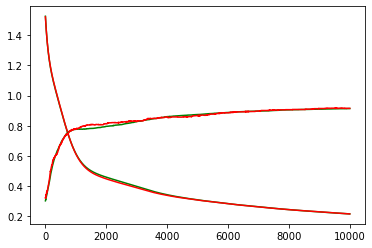

In [35]:
plt.plot(history.epoch, history.history['loss'], 'g')
plt.plot(history.epoch, history.history['val_loss'],'r')
plt.plot(history.epoch, history.history['acc'],'g')
plt.plot(history.epoch, history.history['val_acc'],'r')
loss, accuracy = model.evaluate(xtest,ytest)
print(accuracy*100)